# Damaris Campos- Project 1

**Problems should range from medium (13) to complex (7)** 

- All queries must use the ANSI 92 standard for queries with the type safe “on” and will have relational output

## **<mark style=background-color:#82D5E2>Top 3 Best Problems</mark>**

Prioritize their top 3 problems (medium, complex); explain why they chose these problems for their top rating 

## **Top 1 (Complex - Northwinds2022TSQLV7)**

<u>Proposition:</u>


- Write a query to retrieve the name of the most bought product, along with its supplier's country and the total quantity purchased for each of the products in 2016, including their order dates. 
- Tables involved: Production.Product, Production.Supplier,Sales.OrderDetail, Sales.\[Order\]

<u>Standard View:</u>

 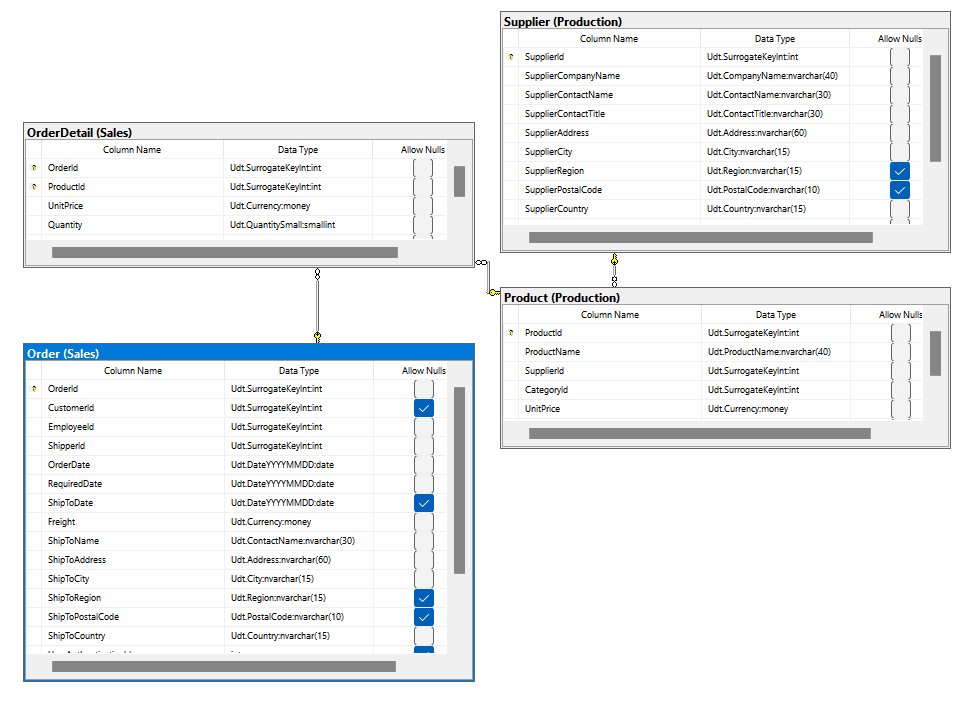

<u>Key View:</u>

 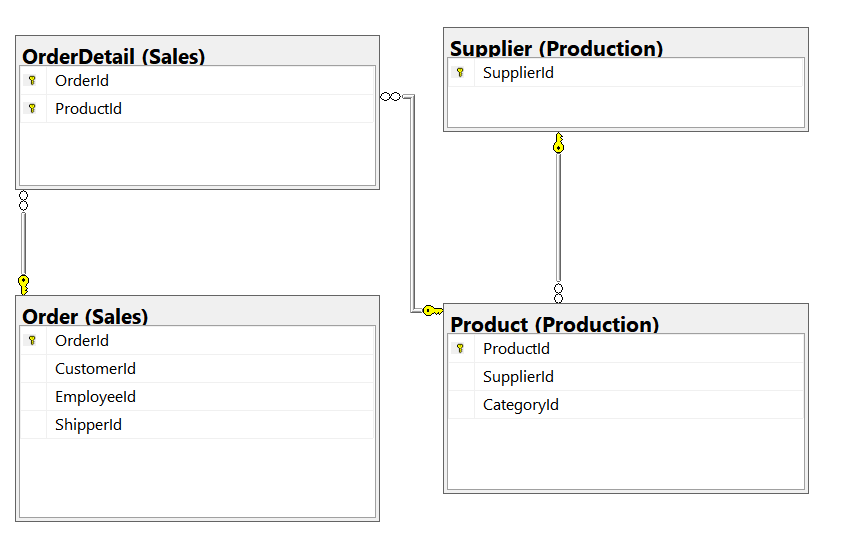

<u>Columns:</u>

| Table Name | Column Name |
| --- | --- |
| Production.Product | ProductId<br><br> |
|  | ProductName |
| Production.Supplier | SupplierCountry |
| Sales.OrderDetail | Quantity |
|  | OrderId |
| Sales.\[Order\] | OrderId |
|  | OrderDate |

In [3]:
USE Northwinds2022TSQLV7;
GO

-- Define a custom scalar function to categorize total quantity
DROP FUNCTION IF EXISTS dbo.CategorizeTotalQuantity;
GO
CREATE FUNCTION dbo.CategorizeTotalQuantity(@Quantity AS INT)
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @Quantity < 100 THEN 'Low Quantity'
            WHEN @Quantity >= 100 AND @Quantity < 500 THEN 'Medium Quantity'
            ELSE 'High Quantity'
        END;
    
    RETURN @Category;
END;
GO

WITH ProductSupplierSales AS (
    SELECT 
        p.ProductId,
        p.ProductName,
        s.SupplierCountry,
        SUM(od.Quantity) AS TotalQuantity,
        dbo.CategorizeTotalQuantity(SUM(od.Quantity)) AS QuantityCategory
    FROM 
        Production.Product p
    INNER JOIN 
        Production.Supplier s ON p.SupplierId = s.SupplierId
    INNER JOIN 
        Sales.OrderDetail od ON p.ProductId = od.ProductId
    INNER JOIN 
        Sales.[Order] o ON od.OrderId = o.OrderId
    WHERE 
        YEAR(o.OrderDate) = 2016
    GROUP BY 
        p.ProductId, p.ProductName, s.SupplierCountry
)
SELECT 
    ProductName,
    SupplierCountry,
    TotalQuantity,
    QuantityCategory
FROM 
    ProductSupplierSales
ORDER BY 
    TotalQuantity DESC
FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeTotalQuantity;
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(76 rows affected)

Total execution time: 00:00:00.031

ProductName SupplierCountry TotalQuantity QuantityCategory Product POXFU Japan 659 High Quantity Product QOGNU Brazil 546 High Quantity Product WHBYK France 542 High Quantity Product UKXRI France 513 High Quantity Product HMLNI USA 414 Medium Quantity Product BWRLG Germany 405 Medium Quantity Product HHYDP UK 399 Medium Quantity Product RECZE UK 396 Medium Quantity Product JYGFE Finland 388 Medium Quantity Product WUXYK Canada 351 Medium Quantity Product VJZZH UK 351 Medium Quantity Product MYMOI Norway 342 Medium Quantity Product HCQDE Germany 335 Medium Quantity Product PAFRH Australia 335 Medium Quantity Product VJXYN Germany 318 Medium Quantity Product TTEEX USA 318 Medium Quantity Product YHXGE Japan 311 Medium Quantity Product YZIXQ USA 303 Medium Quantity Product XWOXC Italy 297 Medium Quantity Product LUNZZ Germany 296 Medium Quantity Product TBTBL UK 281 Medium Quantity Product NEVTJ USA 263 Medium Quantity Product QDOMO France 260 Medium Quantity Product YYWRT Canada 256 Medium Quantity Product TOONT Australia 248 Medium Quantity Product SWNJY USA 245 Medium Quantity Product LSOFL France 244 Medium Quantity Product GMKIJ Sweden 234 Medium Quantity Product QMVUN Spain 222 Medium Quantity Product XKXDO UK 222 Medium Quantity Product APITJ Australia 222 Medium Quantity Product BLCAX Australia 217 Medium Quantity Product FPYPN Finland 217 Medium Quantity Product HLGZA Germany 211 Medium Quantity Product RJVNM Singapore 209 Medium Quantity Product XYZPE Canada 207 Medium Quantity Product ACRVI France 202 Medium Quantity Product ASTMN Norway 202 Medium Quantity Product VKCMF Italy 196 Medium Quantity Product LYERX Germany 196 Medium Quantity Product GEEOO Italy 193 Medium Quantity Product JLUDZ Sweden 188 Medium Quantity Product ZZZHumanResources Singapore 186 Medium Quantity Product OVLQI Italy 177 Medium Quantity Product VAIIV USA 165 Medium Quantity Product OFBNT Germany 161 Medium Quantity Product CBRRL Denmark 161 Medium Quantity Product BKGEA Australia 159 Medium Quantity Product CKEDC Australia 151 Medium Quantity Product EPEIM USA 150 Medium Quantity Product ICKNK Australia 147 Medium Quantity Product NUNAW Italy 147 Medium Quantity Product QSRXF Australia 139 Medium Quantity Product COAXA Norway 135 Medium Quantity Product CPHFY Sweden 133 Medium Quantity Product WVJFP USA 118 Medium Quantity Product XLXQF USA 114 Medium Quantity Product QHFFP UK 111 Medium Quantity Product EZZPR Netherlands 110 Medium Quantity Product IMEHJ UK 108 Medium Quantity Product QAQRL Canada 107 Medium Quantity Product AQOKR Denmark 101 Medium Quantity Product XYWBZ USA 100 Medium Quantity Product OSFNS Spain 96 Low Quantity Product LYLNI Germany 95 Low Quantity Product KSBRM USA 82 Low Quantity Product EVFFA Sweden 68 Low Quantity Product VJIEO Singapore 67 Low Quantity Product SMIOH Germany 65 Low Quantity Product BIUDV Finland 55 Low Quantity Product BKAZJ Japan 40 Low Quantity Product PWCJB Japan 21 Low Quantity Product WEUJZ Sweden 12 Low Quantity Product MYNXN Netherlands 8 Low Quantity Product AOZBW Japan 3 Low Quantity Product LQMGN USA 1 Low Quantity

## **Top 2 (Medium - <mark>A</mark>dventureWorksDW2017**

<u>Proposition:</u>

- Retrieve customer demogr<mark>a</mark>phic inform<mark>a</mark>tion, c<mark>a</mark>tegorize customers into <mark>a</mark>ge groups, <mark>a</mark>nd include their country region n<mark>a</mark>me
- T<mark>a</mark>bles involved: DimCustomer, DimGeogr<mark>a</mark><span style="color: var(--vscode-foreground);">phy</span>

<u>St<mark>a</mark>nd<mark>a</mark>rd View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [92]:
USE AdventureWorksDW2017;
GO

-- Common Table Expression (CTE) with inner join
WITH CustomerAgeCategory AS (
    SELECT 
        c.CustomerKey,
        c.FirstName,
        c.LastName,
        c.EnglishEducation,
        c.BirthDate,
        c.EnglishOccupation,
        c.YearlyIncome,
        CASE
            WHEN DATEDIFF(YEAR, c.BirthDate, GETDATE()) <= 20 THEN 'Under 20'
            WHEN DATEDIFF(YEAR, c.BirthDate, GETDATE()) BETWEEN 21 AND 30 THEN '21-30'
            WHEN DATEDIFF(YEAR, c.BirthDate, GETDATE()) BETWEEN 31 AND 40 THEN '31-40'
            WHEN DATEDIFF(YEAR, c.BirthDate, GETDATE()) BETWEEN 41 AND 50 THEN '41-50'
            WHEN DATEDIFF(YEAR, c.BirthDate, GETDATE()) BETWEEN 51 AND 60 THEN '51-60'
            ELSE 'Over 60'
        END AS AgeCategory,
        dg.EnglishCountryRegionName -- Selecting EnglishCountryRegionName from DimGeography
    FROM 
        dbo.DimCustomer AS c
    INNER JOIN
        dbo.DimGeography AS dg ON c.GeographyKey = dg.GeographyKey -- Inner join with DimGeography
)

-- Main query
SELECT 
    CustomerKey,
    FirstName,
    LastName,
    EnglishEducation,
    BirthDate,
    EnglishOccupation,
    YearlyIncome,
    AgeCategory,
    EnglishCountryRegionName -- Including EnglishCountryRegionName in the result set
FROM 
    CustomerAgeCategory
ORDER BY 
    AgeCategory;
GO


Commands completed successfully.

(18484 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:00.225

CustomerKey FirstName LastName EnglishEducation BirthDate EnglishOccupation YearlyIncome AgeCategory EnglishCountryRegionName 11015 Chloe Young Partial College 1984-08-26 Skilled Manual 30000.00 31-40 United States 11016 Wyatt Hill Partial College 1984-10-25 Skilled Manual 30000.00 31-40 United States 11020 Jordan King High School 1984-03-19 Skilled Manual 40000.00 31-40 Canada 11021 Destiny Wilson Partial College 1984-03-02 Skilled Manual 40000.00 31-40 United States 11022 Ethan Zhang Partial College 1984-04-10 Skilled Manual 40000.00 31-40 United States 11023 Seth Edwards Partial College 1984-04-09 Skilled Manual 40000.00 31-40 United States 11024 Russell Xie Partial College 1984-03-16 Skilled Manual 60000.00 31-40 United States 11036 Jennifer Russell Partial College 1984-06-16 Skilled Manual 60000.00 31-40 United States 11049 Carol Rai Partial High School 1986-01-15 Clerical 40000.00 31-40 United States 11053 Ana Price Partial College 1986-02-17 Skilled Manual 60000.00 31-40 United States 11078 Gina Martin High School 1985-01-06 Professional 40000.00 31-40 Canada 11130 Caroline Russell High School 1985-07-05 Skilled Manual 30000.00 31-40 United States 11131 Amanda Rivera High School 1985-09-09 Skilled Manual 30000.00 31-40 Canada 11132 Melissa Richardson High School 1986-04-25 Skilled Manual 30000.00 31-40 Canada 11133 Angela Griffin Partial High School 1986-03-08 Clerical 30000.00 31-40 United States 11135 Marcus Harris Partial High School 1985-05-02 Clerical 30000.00 31-40 United States 11136 Brianna Morgan High School 1984-04-24 Skilled Manual 40000.00 31-40 Canada 11137 Jasmine Taylor High School 1984-01-17 Skilled Manual 40000.00 31-40 United States 11138 Lauren Davis High School 1984-03-14 Skilled Manual 40000.00 31-40 United States 11144 Edward Hernandez High School 1985-03-08 Skilled Manual 40000.00 31-40 United States 11145 Jasmine Coleman High School 1985-06-06 Skilled Manual 40000.00 31-40 United States 11356 Terrence Carson Partial College 1985-11-24 Manual 10000.00 31-40 Australia 11357 Ramon Ye Partial College 1984-09-19 Manual 10000.00 31-40 Australia 11358 Cynthia Malhotra Partial College 1984-05-10 Manual 10000.00 31-40 Australia 11359 Jarrod Prasad Partial College 1984-03-03 Manual 10000.00 31-40 Australia 11360 Tyrone Serrano Partial College 1984-01-30 Manual 10000.00 31-40 Australia 11364 Jennifer Collins High School 1985-03-22 Manual 10000.00 31-40 Australia 11365 Brittney Sun High School 1984-12-06 Manual 10000.00 31-40 Australia 11366 Virginia Patel Bachelors 1985-04-23 Clerical 20000.00 31-40 Australia 11367 Calvin Nara Bachelors 1984-08-21 Clerical 20000.00 31-40 Australia 11368 Edward Miller High School 1984-05-24 Manual 10000.00 31-40 Australia 11369 Ashlee Tang Bachelors 1984-02-01 Clerical 20000.00 31-40 Australia 11453 Stanley Malhotra Bachelors 1984-08-17 Professional 80000.00 31-40 Australia 11473 Grace Henderson Partial High School 1986-01-30 Manual 20000.00 31-40 France 11474 Melvin Xu Partial High School 1985-08-21 Manual 20000.00 31-40 United Kingdom 11475 Cesar Subram High School 1984-04-07 Manual 30000.00 31-40 United Kingdom 11477 Tristan Hughes High School 1984-06-21 Manual 30000.00 31-40 Germany 11478 Billy Hernandez High School 1984-02-22 Manual 30000.00 31-40 France 11480 Colleen Ma Bachelors 1984-03-07 Skilled Manual 40000.00 31-40 France 11592 Darrell Raji High School 1984-03-03 Manual 20000.00 31-40 France 11594 Corey Goel High School 1985-05-03 Manual 20000.00 31-40 France 11595 Sebastian Howard High School 1984-12-29 Manual 20000.00 31-40 Germany 11606 Melody Ramos Partial High School 1986-01-30 Manual 10000.00 31-40 France 11607 Clinton Moreno High School 1986-05-05 Manual 20000.00 31-40 France 11611 Ernest Lin Partial High School 1985-02-23 Manual 20000.00 31-40 France 11612 Keith Andersen Partial High School 1985-10-07 Manual 20000.00 31-40 United Kingdom 11624 Ryan Smith Graduate Degree 1984-03-19 Skilled Manual 50000.00 31-40 United States 11658 Robert Mitchell Graduate D

## **Top 3 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query where ..
- Tables involved:

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [120]:
USE WideWorldImporters;
WITH CustomerOrderDetails AS (
    SELECT
        C.CustomerName,
        O.OrderDate,
        O.ExpectedDeliveryDate,
        I.ConfirmedDeliveryTime,
        CT.TransactionAmount
    FROM
        Sales.Customers AS C
    JOIN
        Sales.Orders AS O ON C.CustomerID = O.CustomerID
    JOIN
        Sales.CustomerTransactions AS CT ON C.CustomerID = CT.CustomerID
    JOIN 
        Sales.Invoices AS I ON O.OrderID = I.OrderID
)
SELECT
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
    FORMAT(ConfirmedDeliveryTime, 'yyyy-MM-dd') AS ConfirmedDeliveryDate, -- Formatted output
    CONCAT(RIGHT('0' + CONVERT(VARCHAR(2), DATEPART(hh, ConfirmedDeliveryTime) % 12), 2), 
           ':', 
           RIGHT('0' + CONVERT(VARCHAR(2), DATEPART(mi, ConfirmedDeliveryTime)), 2),
           ' ',
           CASE WHEN DATEPART(hh, ConfirmedDeliveryTime) < 12 THEN 'AM' ELSE 'PM' END) AS ConfirmedDeliveryTime, -- Standard time conversion
    TransactionAmount,
    CASE 
        WHEN CAST(ExpectedDeliveryDate AS DATE) = CAST(ConfirmedDeliveryTime AS DATE) THEN 'Same Day Delivery'
        WHEN ConfirmedDeliveryTime > ExpectedDeliveryDate THEN 'Delayed Delivery'
        ELSE 'On Time' -- You can modify this accordingly
    END AS DeliveryStatus
FROM
    CustomerOrderDetails
WHERE 
    TransactionAmount > 35000
    AND DATEDIFF(day, OrderDate, ExpectedDeliveryDate) >= 0 
ORDER BY
    TransactionAmount DESC;


(116 rows affected)

Total execution time: 00:00:00.074

CustomerName OrderDate ExpectedDeliveryDate ConfirmedDeliveryDate ConfirmedDeliveryTime TransactionAmount DeliveryStatus Cong Hoa 2013-01-07 2013-01-08 2013-01-08 01:35 PM 36829.90 Same Day Delivery Cong Hoa 2013-01-29 2013-01-30 2013-01-30 11:00 AM 36829.90 Same Day Delivery Cong Hoa 2013-02-04 2013-02-05 2013-02-05 11:15 AM 36829.90 Same Day Delivery Cong Hoa 2013-02-06 2013-02-07 2013-02-07 09:20 AM 36829.90 Same Day Delivery Cong Hoa 2013-02-14 2013-02-15 2013-02-15 10:30 AM 36829.90 Same Day Delivery Cong Hoa 2013-02-14 2013-02-15 2013-02-26 07:20 AM 36829.90 Delayed Delivery Cong Hoa 2013-03-02 2013-03-04 2013-03-03 07:25 AM 36829.90 On Time Cong Hoa 2013-03-05 2013-03-06 2013-03-06 10:15 AM 36829.90 Same Day Delivery Cong Hoa 2013-03-13 2013-03-14 2013-03-14 08:15 AM 36829.90 Same Day Delivery Cong Hoa 2013-03-16 2013-03-18 2013-03-17 07:45 AM 36829.90 On Time Cong Hoa 2013-04-17 2013-04-18 2013-04-18 01:55 PM 36829.90 Same Day Delivery Cong Hoa 2013-04-26 2013-04-29 2013-04-27 08:35 AM 36829.90 On Time Cong Hoa 2013-04-26 2013-04-29 2013-05-01 07:20 AM 36829.90 Delayed Delivery Cong Hoa 2013-05-06 2013-05-07 2013-05-07 01:50 PM 36829.90 Same Day Delivery Cong Hoa 2013-05-13 2013-05-14 2013-05-14 10:55 AM 36829.90 Same Day Delivery Cong Hoa 2013-05-31 2013-06-03 2013-06-01 11:35 AM 36829.90 On Time Cong Hoa 2013-06-05 2013-06-06 2013-06-06 11:55 AM 36829.90 Same Day Delivery Cong Hoa 2013-06-08 2013-06-10 2013-06-09 09:20 AM 36829.90 On Time Cong Hoa 2013-06-27 2013-06-28 2013-06-28 08:45 AM 36829.90 Same Day Delivery Cong Hoa 2013-07-17 2013-07-18 2013-07-18 01:55 PM 36829.90 Same Day Delivery Cong Hoa 2013-07-17 2013-07-18 2013-08-09 07:05 AM 36829.90 Delayed Delivery Cong Hoa 2013-07-18 2013-07-19 2013-07-19 08:05 AM 36829.90 Same Day Delivery Cong Hoa 2013-07-27 2013-07-29 2013-07-28 07:35 AM 36829.90 On Time Cong Hoa 2013-08-02 2013-08-05 2013-08-03 07:40 AM 36829.90 On Time Cong Hoa 2013-08-29 2013-08-30 2013-08-30 11:05 AM 36829.90 Same Day Delivery Cong Hoa 2013-08-29 2013-08-30 2013-10-10 07:10 AM 36829.90 Delayed Delivery Cong Hoa 2013-09-14 2013-09-16 2013-09-15 09:35 AM 36829.90 On Time Cong Hoa 2013-10-11 2013-10-14 2013-10-12 07:50 AM 36829.90 On Time Cong Hoa 2013-10-24 2013-10-25 2013-10-25 07:40 AM 36829.90 Same Day Delivery Cong Hoa 2013-11-04 2013-11-05 2013-11-05 07:55 AM 36829.90 Same Day Delivery Cong Hoa 2013-11-04 2013-11-05 2013-11-05 09:35 AM 36829.90 Same Day Delivery Cong Hoa 2013-11-07 2013-11-08 2013-11-08 10:25 AM 36829.90 Same Day Delivery Cong Hoa 2013-12-02 2013-12-03 2013-12-03 07:55 AM 36829.90 Same Day Delivery Cong Hoa 2013-12-02 2013-12-03 2013-12-04 07:20 AM 36829.90 Delayed Delivery Cong Hoa 2013-12-03 2013-12-04 2013-12-04 02:30 PM 36829.90 Same Day Delivery Cong Hoa 2013-12-12 2013-12-13 2013-12-13 08:20 AM 36829.90 Same Day Delivery Cong Hoa 2014-03-05 2014-03-06 2014-03-06 08:10 AM 36829.90 Same Day Delivery Cong Hoa 2014-03-11 2014-03-12 2014-03-12 10:20 AM 36829.90 Same Day Delivery Cong Hoa 2014-03-14 2014-03-17 2014-03-15 10:05 AM 36829.90 On Time Cong Hoa 2014-03-21 2014-03-24 2014-03-22 09:25 AM 36829.90 On Time Cong Hoa 2014-03-26 2014-03-27 2014-03-27 10:25 AM 36829.90 Same Day Delivery Cong Hoa 2014-03-27 2014-03-28 2014-03-28 08:25 AM 36829.90 Same Day Delivery Cong Hoa 2014-03-28 2014-03-31 2014-03-29 10:20 AM 36829.90 On Time Cong Hoa 2014-03-31 2014-04-01 2014-04-01 11:15 AM 36829.90 Same Day Delivery Cong Hoa 2014-04-14 2014-04-15 2014-04-15 09:40 AM 36829.90 Same Day Delivery Cong Hoa 2014-04-25 2014-04-28 2014-04-26 03:25 PM 36829.90 On Time Cong Hoa 2014-04-29 2014-04-30 2014-04-30 07:55 AM 36829.90 Same Day Delivery Cong Hoa 2014-05-02 2014-05-05 2014-05-03 10:30 AM 36829.90 On Time Cong Hoa 2014-05-19 2014-05-20 2014-05-20 11:55 AM 36829.90 Same Day Delivery Cong Hoa 2014-05-20 2014-05-21 2014-05-21 09:40 AM 36829.90 Same Day Delivery Cong Hoa 2014-05-29 2014-05-30 2014-05-30 02:25 PM 36829.90 Same Day Delivery Cong Hoa 2014-06-02 2014-06-03 2014-06-03 10:5

## **<mark style=background-color:#BFBBE4>Top Worst 3 Problems</mark>**

Prioritize their 3 worst problems (medium, and complex); explain why they chose these problems for their lowest rating. How can the problems be fixed to make them better?

## **Worst 1 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Retrieve a query that calculates the yearly count of distinct customers, comparing the current year's number of customers with the previous year to determine if there was growth.
- Tables involved: Sales.[Orders], Sales.Customers

<u>Standard View:</u>

 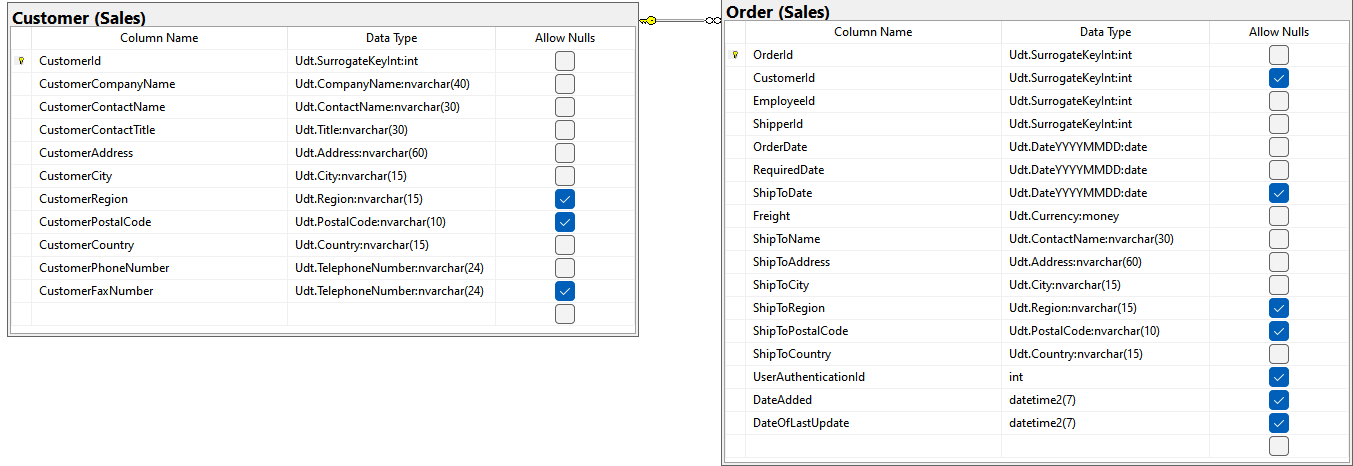

<u>Key View:</u>

 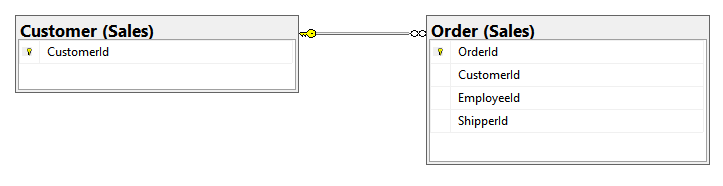

<u>Columns:</u>

| Table Name| Column Name|
| --- | --- |
| Sales.[Order] | OrderDate, CustomerId | 
| Sales.Customer | CustomerId, CustomerCity |


In [9]:
USE Northwinds2022TSQLV7;
WITH
    YearlyCount
    AS
    (
        SELECT YEAR(OrderDate) AS YearOrder,
            COUNT(DISTINCT CustomerId) AS NumberCustomers
        FROM Sales.[Order]
        GROUP BY YEAR(orderdate)
    )
SELECT Cur.YearOrder,
    Cur.NumberCustomers AS CurrentNumCustomers,
    Prv.NumberCustomers AS PreviousNumCustomers,
    Cur.NumberCustomers - Prv.NumberCustomers AS Growth,
    CustomerCity
FROM YearlyCount AS Cur
    LEFT OUTER JOIN YearlyCount AS Prv
    ON Cur.YearOrder = Prv.YearOrder + 1
    LEFT JOIN Sales.Customer AS C
    ON Cur.NumberCustomers = C.CustomerId;

--------------------------------------------------------------
-- Fixed 
--------------------------------------------------------------
USE Northwinds2022TSQLV7;
WITH
    YearlyCount
    AS
    (
        SELECT YEAR(OrderDate) AS YearOrder,
            COUNT(DISTINCT CustomerId) AS NumberCustomers
        FROM Sales.[Order]
        GROUP BY YEAR(orderdate)
    )
SELECT Cur.YearOrder,
    Cur.NumberCustomers AS CurrentNumCustomers,
    Prv.NumberCustomers AS PreviousNumCustomers,
    Cur.NumberCustomers - Prv.NumberCustomers AS Growth,
    CASE 
     WHEN Prv.NumberCustomers IS NULL THEN 'No Previous Data'
     WHEN Cur.NumberCustomers > Prv.NumberCustomers THEN 'Growth'
     WHEN Cur.NumberCustomers < Prv.NumberCustomers THEN 'Decline'
    ELSE 'Unknown'
    END AS GrowthStatus,
    CustomerCity
FROM YearlyCount AS Cur
    LEFT OUTER JOIN YearlyCount AS Prv
    ON Cur.YearOrder = Prv.YearOrder + 1
    LEFT JOIN Sales.Customer AS C
    ON Cur.NumberCustomers = C.CustomerId
FOR JSON PATH, ROOT('MediumWorst#1'), INCLUDE_NULL_VALUES;


(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.025

YearOrder CurrentNumCustomers PreviousNumCustomers Growth CustomerCity 2014 67 NULL NULL Rio de Janeiro 2015 86 67 19 Stuttgart 2016 81 86 -5 Sao Paulo

YearOrder CurrentNumCustomers PreviousNumCustomers Growth GrowthStatus CustomerCity 2014 67 NULL NULL No Previous Data Rio de Janeiro 2015 86 67 19 Growth Stuttgart 2016 81 86 -5 Decline Sao Paulo

## **Worst 2 (Medium - AdventureWorks2017)**

<u>Proposition:</u>

- Retrieve a query to analyze the influence of rate changes on employees' personal status and job roles
- Tables involved: HumanResources.EmployeePayHistory, HumanResources.Employee

<u>Standard View:</u>

 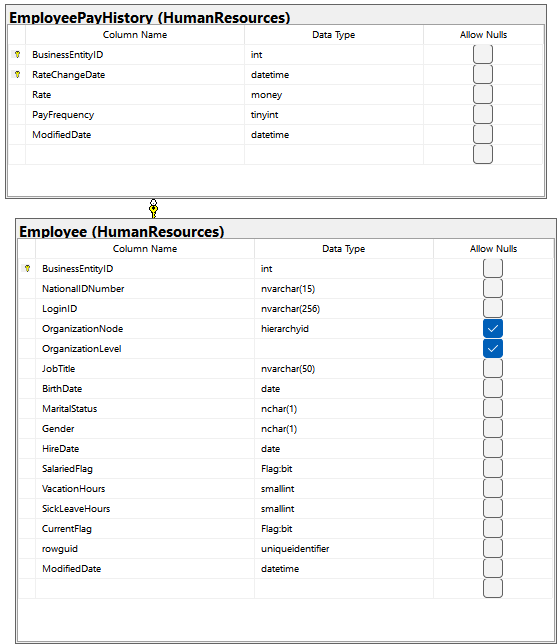

<u>Key View:</u>

 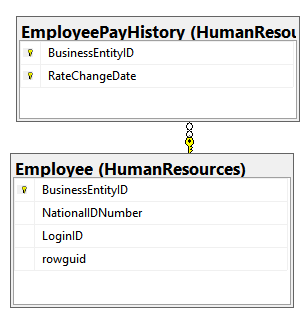

<u>Columns:</u>

| Table Name| Column Name|
| --- | --- |
| HumanResources.EmployeePayHistory | Rate, Year | 
| HumanResources.Employee | JobTitle, MaritalStatus, Gener, VacationHours, SickLeaveHours |

In [51]:
USE AdventureWorks2017;

WITH RateChanges AS (
    SELECT 
        Rate,
        BusinessEntityID,
        YEAR(RateChangeDate) AS Year,
        MONTH(RateChangeDate) AS Month
    FROM 
        HumanResources.EmployeePayHistory
)
SELECT 
    E.JobTitle, 
    E.MaritalStatus, 
    E.Gender, 
    E.VacationHours, 
    E.SickLeaveHours,
    RC.Rate,
    RC.Year
FROM 
    HumanResources.Employee AS E
INNER JOIN 
    RateChanges AS RC 
ON 
    RC.BusinessEntityID = E.BusinessEntityID
WHERE 
    E.JobTitle = N'Application Specialist' 
    OR E.JobTitle = N'Design Engineer'
ORDER BY 
    E.Gender, 
    E.JobTitle;



---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------
-- Tables involved: HumanResources.EmployeePayHistory, HumanResources.Employee, HumanResources.EmployeeDepartmentHistory, HumanResources.Department

USE AdventureWorks2017;

WITH RateChanges AS (
    SELECT 
        Rate,
        BusinessEntityID,
        YEAR(RateChangeDate) AS Year,
        MONTH(RateChangeDate) AS Month
    FROM 
        HumanResources.EmployeePayHistory
)
SELECT 
    E.JobTitle, 
    E.Gender, 
    E.VacationHours, 
    E.SickLeaveHours,
    RC.Rate,
    RC.Year,
    D.Name
FROM 
    HumanResources.Employee AS E
INNER JOIN 
    RateChanges AS RC 
ON 
    RC.BusinessEntityID = E.BusinessEntityID
INNER JOIN
    HumanResources.EmployeeDepartmentHistory AS EDH
ON
    EDH.BusinessEntityID = E.BusinessEntityID
INNER JOIN
    HumanResources.Department AS D
ON  
    D.DepartmentID = EDH.DepartmentID
WHERE 
    E.JobTitle = N'Application Specialist' 
    OR E.JobTitle = N'Design Engineer'
ORDER BY 
    E.JobTitle
FOR JSON PATH, ROOT('MediumWorst#2'), INCLUDE_NULL_VALUES;


(7 rows affected)

(7 rows affected)

Total execution time: 00:00:01.106

JobTitle MaritalStatus Gender VacationHours SickLeaveHours Rate Year Application Specialist S F 74 57 27.4038 2009 Application Specialist M F 71 55 27.4038 2008 Design Engineer M F 4 22 32.6923 2011 Design Engineer M F 5 22 32.6923 2008 Application Specialist S M 73 56 27.4038 2009 Application Specialist M M 72 56 27.4038 2009 Design Engineer M M 6 23 32.6923 2008

JSON_F52E2B61-18A1-11d1-B105-00805F49916B {"MediumWorst#2":[{"JobTitle":"Application Specialist","Gender":"F","VacationHours":74,"SickLeaveHours":57,"Rate":27.4038,"Year":2009,"Name":"Information Services"},{"JobTitle":"Application Specialist","Gender":"M","VacationHours":73,"SickLeaveHours":56,"Rate":27.4038,"Year":2009,"Name":"Information Services"},{"JobTitle":"Application Specialist","Gender":"M","VacationHours":72,"SickLeaveHours":56,"Rate":27.4038,"Year":2009,"Name":"Information Services"},{"JobTitle":"Application Specialist","Gender":"F","VacationHours":71,"SickLeaveHours":55,"Rate":27.4038,"Year":2008,"Name":"Information Services"},{"JobTitle":"Design Engineer","Gender":"F","VacationHours":5,"SickLeaveHours":22,"Rate":32.6923,"Year":2008,"Name":"Engineering"},{"JobTitle":"Design Engineer","Gender":"M","VacationHours":6,"SickLeaveHours":23,"Rate":32.6923,"Year":2008,"Name":"Engineering"},{"JobTitle":"Design Engineer","Gender":"F","VacationHours":4,"SickLeaveHours":22,"Rate":32.6923,"Year":2011,"Name":"Engineering"}]}

## **Worst 3 (Medium - <mark><mark>A</mark></mark>dventureWorks2017)**

<u>Proposition:</u>

- Write <mark>a</mark> <mark>query</mark> th<mark>a</mark>t retrieves inform<mark>a</mark>tion <mark>a</mark>bout employees from the <mark>A</mark>dventureWorks2017 d<mark>a</mark>t<mark>a</mark>b<mark>a</mark>se b<mark>a</mark>sed on specific criteri<mark>a</mark> for their v<mark>a</mark>c<mark>a</mark>tion <mark>a</mark>nd sick le<mark>a</mark>ve hours. This <mark>query</mark> selects the employees' job title, m<mark>a</mark>rit<mark>a</mark>l st<mark>a</mark>tus, gender, v<mark>a</mark>c<mark>a</mark>tion hours, sick le<mark>a</mark>ve hours, p<mark>a</mark>y r<mark>a</mark>te ch<mark>a</mark>nges over time, <mark>a</mark>nd the corresponding ye<mark>a</mark>r of the r<mark>a</mark>te ch<mark>a</mark>nge
- <span style="color: var(--vscode-foreground);">T<mark data-markjs="true" class="rangeHighlight">a</mark>bles involved:&nbsp;</span> Hum<mark>a</mark><span style="color: var(--vscode-foreground);">nResources.Employee, Hum</span><mark>a</mark><span style="color: var(--vscode-foreground);">nResources.EmployeeP</span><mark>a</mark><span style="color: var(--vscode-foreground);">yHistory</span>

<u>St<mark><mark>a</mark></mark>nd<mark><mark>a</mark></mark>rd View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [24]:
USE AdventureWorks2017;

WITH RateChanges AS (
    SELECT 
        Rate,
        BusinessEntityID,
        YEAR(RateChangeDate) AS Year,
        MONTH(RateChangeDate) AS Month
    FROM 
        HumanResources.EmployeePayHistory
)
SELECT 
    E.JobTitle, 
    E.MaritalStatus, 
    E.Gender, 
    E.VacationHours, 
    E.SickLeaveHours,
    RC.Rate,
    RC.Year
FROM 
    HumanResources.Employee AS E
INNER JOIN 
    RateChanges AS RC 
ON 
    RC.BusinessEntityID = E.BusinessEntityID
WHERE 
    E.VacationHours >= 30 AND E.VacationHours <= 50
    AND E.SickLeaveHours >= 20 AND E.SickLeaveHours <= 40
ORDER BY 
    E.Gender, 
    E.JobTitle;

---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------




Commands completed successfully.

Total execution time: 00:00:00

## Q7 (Medium - WideWorldImporters)

<u>Proposition:</u>

- Retrieve information about the maximum transaction amount paid by each customer on February 2, 2015, along with details about where the customer spent this amount and the website URL associated with the customer.
- Tables involved: Sales.CustomerTransactions, Sales.Orders, Website.Customers
    

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns
    
-

In [ ]:
USE WideWorldImporters;

WITH CustomersPayment AS
(
    SELECT
        MAX(TransactionAmount) AS TotalAmountPaid,
        COUNT(DISTINCT CustomerID) AS NumberCustomers,
        CustomerID
    FROM Sales.CustomerTransactions
    GROUP BY CustomerID
)

SELECT
    CP.TotalAmountPaid,
    SO.OrderDate,
    WC.CustomerCategoryName,
    WC.WebsiteURL
FROM 
    CustomersPayment AS CP
INNER JOIN
    Sales.Orders AS SO ON CP.CustomerID = SO.CustomerID
INNER JOIN  
    Website.Customers AS WC ON WC.CustomerID = SO.CustomerID
WHERE   
   SO.OrderDate = '20150202'

ORDER BY 
    TotalAmountPaid DESC
--FOR JSON PATH, ROOT('MediumWorst#1'), INCLUDE_NULL_VALUES;

## Q8 (Medium - AdventureWorksDW2017)

<u>Proposition:</u>

- Return a query that analyzes seasonal trends in bike sales based on gender in the United States for the year 2011. The query should categorize sales data into cold weather (December to May) and warm weather (June to November) seasons and provide insights into the total sales amount and the number of orders placed by customers of different genders across different sales territory regions.
- Tables involved:  dbo.DimCustomer, dbo.FactInternetSales, dbo.DimSalesTerritory, dbo.DimProduct, dbo.DimProductSubcategory, dbo.DimProductCategory.
    

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns
    
-

In [48]:
USE AdventureWorksDW2017;

SELECT 
    YEAR(DerivedTable.OrderDate) AS OrderYear,
    CASE
        WHEN MONTH(DerivedTable.OrderDate) IN (12, 1, 2, 3, 4 ,5) THEN 'Cold Weather'
        WHEN MONTH(DerivedTable.OrderDate) IN (6, 7, 8, 9, 10, 11) THEN 'Warm Weather'
        ELSE 'Unknown'
    END AS Season,
    DerivedTable.Gender,
    SUM(DerivedTable.MaxSalesAmount) AS TotalSalesAmount,
    COUNT(*) AS NumberOfOrders,
    DerivedTable.SalesTerritoryRegion,
    DerivedTable.EnglishProductCategoryName AS ProductName
FROM (
    SELECT 
        MAX(S.SalesAmount) AS MaxSalesAmount,
        S.OrderDate,
        C.Gender,
        DT.SalesTerritoryCountry,
        DT.SalesTerritoryRegion,
        DPC.EnglishProductCategoryName
    FROM dbo.DimCustomer AS C
    INNER JOIN dbo.FactInternetSales AS S ON C.CustomerKey = S.CustomerKey
    INNER JOIN dbo.DimSalesTerritory AS DT ON S.SalesTerritoryKey = DT.SalesTerritoryKey
    INNER JOIN dbo.DimProduct AS DP ON DP.ProductKey = S.ProductKey
    INNER JOIN dbo.DimProductSubcategory AS DPS ON DPS.ProductSubcategoryKey = DP.ProductSubcategoryKey
    INNER JOIN dbo.DimProductCategory AS DPC ON DPC.ProductCategoryKey = DPS.ProductCategoryKey
    WHERE DT.SalesTerritoryCountry = 'United States'
    GROUP BY S.OrderDate, C.Gender, DT.SalesTerritoryCountry, DPC.EnglishProductCategoryName, DT.SalesTerritoryRegion
) AS DerivedTable
WHERE 
    DerivedTable.EnglishProductCategoryName = N'Bikes'
    AND YEAR(DerivedTable.OrderDate) = '2011'
GROUP BY YEAR(DerivedTable.OrderDate), 
    CASE
        WHEN MONTH(DerivedTable.OrderDate) IN (12, 1, 2, 3, 4 ,5) THEN 'Cold Weather'
        WHEN MONTH(DerivedTable.OrderDate) IN (6, 7, 8, 9, 10, 11) THEN 'Warm Weather'
        ELSE 'Unknown'
    END,
    DerivedTable.Gender,
    DerivedTable.SalesTerritoryRegion,
    DerivedTable.EnglishProductCategoryName
ORDER BY OrderYear, Season, DerivedTable.Gender, DerivedTable.SalesTerritoryRegion;


(8 rows affected)

Total execution time: 00:00:00.055

OrderYear Season Gender TotalSalesAmount NumberOfOrders SalesTerritoryRegion ProductName 2011 Cold Weather F 138092.5292 44 Northwest Bikes 2011 Cold Weather F 276010.8038 85 Southwest Bikes 2011 Cold Weather M 201108.9435 61 Northwest Bikes 2011 Cold Weather M 257593.8817 78 Southwest Bikes 2011 Warm Weather F 209038.0928 62 Northwest Bikes 2011 Warm Weather F 316603.731 93 Southwest Bikes 2011 Warm Weather M 224819.8702 72 Northwest Bikes 2011 Warm Weather M 291319.782 90 Southwest Bikes

## Q9 (Medium - WideWorldImporters)

<u>Proposition:</u>

- Return a query where a virtual table named Sales.NYCusts is created. This table provides information about customers in New York.
- Tables involved: Sales.Customers, Sales.Orders, Sales.CustomerCategories, Application.Cities, Application.StateProvinces, and Sales.OrderLines.

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [27]:
USE WideWorldImporters;

DROP VIEW IF EXISTS Sales.NYCusts;
GO

CREATE VIEW Sales.NYCusts
AS
SELECT 
    sc.PhoneNumber, 
    sc.CustomerName, 
    MAX(sc.CreditLimit) AS MaxCreditLimit, -- Maximum credit limit among customers
    so.OrderDate, 
    cc.CustomerCategoryName, 
    ac.CityName, 
    sp.StateProvinceName, 
    ROUND(SUM(ol.UnitPrice * ol.Quantity), 2) AS TotalAmountSpent -- Total amount spent by customers
FROM 
    Sales.Customers AS sc 
INNER JOIN 
    Sales.Orders AS so ON sc.CustomerID = so.CustomerID
INNER JOIN 
    Sales.CustomerCategories AS cc ON cc.CustomerCategoryID = sc.CustomerCategoryID
INNER JOIN 
    Application.Cities AS ac ON sc.DeliveryCityID = ac.CityID
INNER JOIN 
    Application.StateProvinces AS sp ON sp.StateProvinceID = ac.StateProvinceID
INNER JOIN 
    sales.OrderLines AS ol ON so.OrderID = ol.OrderID
WHERE 
    sp.StateProvinceName = N'New York' 
    AND sc.CustomerName NOT LIKE 'Tailspin Toys (%)' 
    AND sc.CustomerName NOT LIKE 'Wingtip Toys (%)' 
    AND YEAR(so.OrderDate) = '2015'
    AND MONTH(so.OrderDate) = '3'
GROUP BY
    sc.PhoneNumber,
    sc.CustomerName,
    so.OrderDate,
    cc.CustomerCategoryName,
    ac.CityName,
    sp.StateProvinceName;

GO

SELECT DISTINCT 
    CustomerName, 
    MaxCreditLimit, 
    TotalAmountSpent,
    OrderDate,
    StateProvinceName, 
    CustomerCategoryName AS CategoryName
FROM 
    Sales.NYCusts
GO

-- Cleanup
DROP VIEW IF EXISTS Sales.NYCusts;


Commands completed successfully.

Commands completed successfully.

(34 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.120

CustomerName MaxCreditLimit TotalAmountSpent OrderDate StateProvinceName CategoryName Kertu Sokk 3000.00 1324.25 2015-03-17 New York Computer Store Stefan Selezeanu 3300.00 5024.00 2015-03-16 New York Computer Store Nicolo Cattaneo 1800.00 2551.20 2015-03-17 New York Corporate Stefan Selezeanu 3300.00 1116.00 2015-03-07 New York Computer Store Bhaamini Palagummi 2300.00 2202.00 2015-03-03 New York Gift Store Jitka Necesana 3200.00 852.00 2015-03-16 New York Computer Store Arijit Bhuiyan 2200.00 1950.50 2015-03-19 New York Computer Store Bhaamini Palagummi 2300.00 1245.00 2015-03-13 New York Gift Store Gayatri Gajula 4000.00 1058.00 2015-03-19 New York Computer Store Jakub Lukes 2100.00 2402.40 2015-03-11 New York Corporate Gayatri Gajula 4000.00 4517.00 2015-03-10 New York Computer Store Stefan Selezeanu 3300.00 5432.00 2015-03-27 New York Computer Store Lana Goransson 1400.00 5820.80 2015-03-18 New York Supermarket Cong Hoa 1500.00 2067.50 2015-03-18 New York Gift Store Bhaamini Palagummi 2300.00 366.00 2015-03-11 New York Gift Store Stefan Selezeanu 3300.00 10328.00 2015-03-10 New York Computer Store Bhaamini Palagummi 2300.00 2114.20 2015-03-10 New York Gift Store Jakub Lukes 2100.00 301.05 2015-03-12 New York Corporate Lana Goransson 1400.00 3849.00 2015-03-12 New York Supermarket Lana Goransson 1400.00 1389.00 2015-03-27 New York Supermarket Nicolo Cattaneo 1800.00 134.00 2015-03-13 New York Corporate Arijit Bhuiyan 2200.00 1456.80 2015-03-09 New York Computer Store Jitka Necesana 3200.00 3704.00 2015-03-07 New York Computer Store Arijit Bhuiyan 2200.00 732.00 2015-03-25 New York Computer Store Lana Goransson 1400.00 642.00 2015-03-04 New York Supermarket Kertu Sokk 3000.00 454.00 2015-03-14 New York Computer Store Victoria Lacusta 3885.00 245.00 2015-03-13 New York Supermarket Arijit Bhuiyan 2200.00 1172.00 2015-03-11 New York Computer Store Jitka Necesana 3200.00 6995.50 2015-03-24 New York Computer Store Victoria Lacusta 3885.00 1054.80 2015-03-09 New York Supermarket Kertu Sokk 3000.00 818.00 2015-03-12 New York Computer Store Jakub Lukes 2100.00 2160.00 2015-03-03 New York Corporate Kertu Sokk 3000.00 2361.00 2015-03-10 New York Computer Store Gayatri Gajula 4000.00 1634.00 2015-03-09 New York Computer Store

## Q10 (Medium - WorldWideImposters)

<u>Proposition:</u>

- Return a query that analyzes sales data from 2015, focusing on high-value transactions in February to ensure timely deliveries. 
- Tables involved include Sales.Customers, Sales.Orders, Sales.CustomerTransactions, and Sales.Invoices.
    

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns
    
-

In [ ]:
USE WideWorldImporters;
WITH CustomerOrderDetails AS (
    SELECT
        C.CustomerName,
        O.OrderDate,
        O.ExpectedDeliveryDate,
        CT.TransactionAmount,
		I.ConfirmedDeliveryTime
    FROM
        Sales.Customers AS C
    JOIN
        Sales.Orders AS O ON C.CustomerID = O.CustomerID
    JOIN
        Sales.CustomerTransactions AS CT ON C.CustomerID = CT.CustomerID
	JOIN 
		Sales.Invoices AS I ON C.CustomerID = I.CustomerID
)
SELECT
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
	ConfirmedDeliveryTime,
    TransactionAmount

FROM
    CustomerOrderDetails
WHERE 
    YEAR(OrderDate) = '2015' 
	AND YEAR(ConfirmedDeliveryTime) = '2015'
    AND MONTH(OrderDate) = '02'
	AND MONTH(ConfirmedDeliveryTIme) = '02'
    AND TransactionAmount > 35000
	 AND DATEDIFF(day, OrderDate, ExpectedDeliveryDate) >= 0 
GROUP BY
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
    TransactionAmount,
	ConfirmedDeliveryTime
ORDER BY
    TransactionAmount DESC;


## Q11 (Medium - WideWorldImportersDW)

<u>Proposition:</u>

- Return a query where we find salespeople and determine who sold the most and how much money they generated through the items they sold.
- Tables involved: Dimension.Employee, Fact.Sale, and Dimension.Date.

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [54]:
USE WideWorldImportersDW;
WITH SalesPersonSales AS (
    SELECT 
        de.[Is Salesperson], 
        de.[Preferred Name],
        de.[Employee Key]
    FROM 
        Dimension.Employee AS de
    WHERE 
        de.[Is Salesperson] = 1
)

SELECT 
    sps.[Preferred Name] AS SalesPersonName,
    COUNT(fs.Quantity) AS NumberOfOrdersSold,
    SUM(fs.[Unit Price] * fs.Quantity) AS TotalSalesAmount,
    MONTH(d.Date) AS SalesMonth
FROM 
    Fact.Sale AS fs
JOIN 
    SalesPersonSales AS sps ON fs.[Salesperson Key] = sps.[Employee Key]
JOIN 
    Dimension.[Date] AS d ON fs.[Invoice Date Key] = d.[Date]
GROUP BY 
    sps.[Preferred Name],
    MONTH(d.Date)
ORDER BY 
    NumberOfOrdersSold DESC;


(108 rows affected)

Total execution time: 00:00:00.124

SalesPersonName NumberOfOrdersSold TotalSalesAmount SalesMonth Hudson 4863 3958518.35 4 Hudson 4792 3642458.50 5 Hudson 4533 3363519.80 1 Hudson 4414 3438557.75 3 Hudson 3838 2764623.95 2 Hudson 3581 2682408.40 7 Hudson 3431 2644393.60 6 Hudson 3422 2554556.05 12 Hudson 3305 2406978.30 8 Hudson 3283 2321229.80 10 Hudson 3105 2379202.40 11 Hudson 3016 2292704.45 9 Jack 2528 1995906.25 5 Taj 2484 1816825.30 4 Taj 2431 1927844.10 5 Archer 2398 1923197.65 4 Archer 2391 1943233.75 5 Lily 2389 1851112.95 5 Taj 2368 1734742.00 1 Anthony 2357 1722916.65 4 Kayla 2356 1810455.90 5 Amy 2355 1742755.50 5 Kayla 2352 1829114.40 1 Anthony 2329 1753293.05 5 Amy 2327 1740382.05 3 Sophia 2327 1793207.85 5 Sophia 2311 1722322.65 3 Anthony 2298 1625193.45 1 Archer 2292 1752502.85 3 Jack 2284 1700180.40 3 Jack 2278 1712986.80 4 Archer 2275 1761052.70 1 Lily 2249 1705532.90 4 Sophia 2244 1669161.05 1 Lily 2235 1611944.35 3 Sophia 2224 1717372.35 4 Anthony 2221 1682570.25 3 Taj 2184 1647199.15 3 Lily 2174 1553511.40 1 Kayla 2169 1704519.50 4 Amy 2147 1529902.85 4 Jack 2139 1526130.25 1 Kayla 2083 1610160.25 3 Lily 2048 1538743.65 7 Amy 2038 1624929.00 1 Archer 1997 1553156.15 2 Sophia 1993 1568702.25 7 Amy 1979 1616726.95 2 Kayla 1962 1457825.40 2 Archer 1956 1490822.70 7 Amy 1955 1472504.30 7 Sophia 1935 1472141.40 2 Anthony 1923 1397746.75 2 Kayla 1907 1415482.05 7 Jack 1871 1433540.00 7 Anthony 1858 1396308.70 7 Taj 1847 1325228.45 7 Taj 1839 1437410.25 2 Kayla 1828 1390476.10 10 Archer 1814 1277036.35 6 Jack 1805 1417366.05 2 Kayla 1803 1296843.05 12 Lily 1799 1330934.60 2 Amy 1794 1317742.10 6 Jack 1788 1377365.75 10 Taj 1784 1359973.60 10 Lily 1774 1274601.85 10 Anthony 1763 1246288.20 10 Sophia 1753 1287305.20 9 Sophia 1752 1275212.30 6 Kayla 1750 1249191.20 6 Jack 1749 1299101.00 9 Kayla 1748 1438969.00 9 Taj 1737 1289791.45 12 Lily 1725 1426499.30 6 Archer 1724 1320498.50 10 Archer 1724 1267375.75 12 Sophia 1692 1202311.60 10 Jack 1685 1260370.55 6 Amy 1676 1183916.60 12 Archer 1661 1294027.65 9 Taj 1658 1272076.20 9 Anthony 1656 1209595.60 6 Lily 1653 1285932.75 12 Sophia 1634 1218330.20 12 Kayla 1630 1246577.60 11 Anthony 1617 1195597.75 9 Jack 1608 1121134.10 11 Taj 1601 1161898.15 11 Amy 1596 1190596.10 10 Lily 1592 1129525.65 9 Anthony 1591 1200192.25 12 Amy 1583 1115302.80 9 Archer 1577 1128906.05 11 Jack 1574 1162763.35 12 Amy 1568 1229837.80 8 Lily 1564 1244777.50 11 Taj 1562 1191479.75 6 Anthony 1550 1262738.45 11 Sophia 1533 1243188.40 11 Archer 1522 1232288.35 8 Sophia 1508 1110834.20 8 Kayla 1491 1117263.95 8 Taj 1480 1130148.10 8 Jack 1475 1065673.90 8 Lily 1440 1139564.00 8 Amy 1426 1017215.20 11 Anthony 1358 1087055.40 8

## Q12 (Medium - AdventureWorksDW2017)

<u>Proposition:</u>

- Analyze customer spending behavior by considering their total spending on purchases, the number of orders placed, average spending per order, total order quantity, and the ratio of spending to yearly income. 
- Tables involved: FactInternetSales, DimProduct, DimProductSubcategory, DimProductCategory, FactSurveyResponse, and DimCustomer.

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [81]:
USE AdventureWorksDW2017;

WITH customerexpenses AS (
    SELECT 
        fis.CustomerKey, 
        fis.OrderDate, 
        fis.TotalProductCost, 
        fis.OrderQuantity, 
        dpc.EnglishProductCategoryName,
        YEAR(fis.OrderDate) AS OrderYear -- Extract year from OrderDate
    FROM 
        FactInternetSales AS fis
    INNER JOIN 
        DimProduct AS dp ON dp.ProductKey = fis.ProductKey
    INNER JOIN 
        DimProductSubcategory AS dps ON dp.ProductSubcategoryKey = dps.ProductSubcategoryKey
    INNER JOIN 
        DimProductCategory AS dpc ON dps.ProductCategoryKey = dpc.ProductCategoryKey
)
SELECT 
    dc.CustomerKey,
    dc.FirstName, 
    dc.EnglishOccupation, 
    dc.YearlyIncome,
    SUM(ce.TotalProductCost) AS TotalSpent, -- Total spending of each customer
    COUNT(DISTINCT ce.OrderDate) AS TotalOrders,
    AVG(ce.TotalProductCost) AS AvgSpentPerOrder, -- Average spending per order
    SUM(ce.OrderQuantity) AS TotalOrderQuantity,
    AVG(ce.OrderQuantity) AS AvgOrderQuantity,
    SUM(ce.TotalProductCost) / dc.YearlyIncome AS SpentToIncomeRatio -- Spending to income ratio
FROM 
    customerexpenses AS ce 
INNER JOIN 
    FactSurveyResponse AS fsr ON ce.CustomerKey = fsr.CustomerKey
INNER JOIN 
    DimCustomer AS dc ON fsr.CustomerKey = dc.CustomerKey
WHERE dc.EnglishOccupation IN ('Professional', 'Manual')
GROUP BY 
    dc.CustomerKey,
    dc.FirstName, 
    dc.EnglishOccupation, 
    dc.YearlyIncome
ORDER BY 
    TotalSpent DESC; -- Order customers by total spending


(744 rows affected)

Total execution time: 00:00:00.080

CustomerKey FirstName EnglishOccupation YearlyIncome TotalSpent TotalOrders AvgSpentPerOrder TotalOrderQuantity AvgOrderQuantity SpentToIncomeRatio 19611 Meagan Professional 70000.00 14953.738 2 1246.1448 12 1 0.2136 11241 Lisa Professional 100000.00 13308.1634 7 266.1632 50 1 0.133 12631 Clarence Professional 70000.00 12994.2554 4 590.6479 22 1 0.1856 13103 Brendan Professional 70000.00 11711.7297 3 487.9887 24 1 0.1673 14525 Claudia Manual 10000.00 11710.2276 3 650.5682 18 1 1.171 13006 Whitney Professional 90000.00 11570.1891 3 964.1824 12 1 0.1285 13577 Theodore Professional 70000.00 11328.572 4 514.935 22 1 0.1618 18296 Trisha Professional 70000.00 11286.5172 2 627.0287 18 1 0.1612 20616 Kristi Professional 120000.00 11259.0393 2 750.6026 15 1 0.0938 19094 Todd Professional 90000.00 11178.7263 2 1863.121 6 1 0.1242 11001 Eugene Professional 60000.00 10763.9883 3 326.1814 33 1 0.1793 23655 Grace Professional 90000.00 10405.1856 2 1300.6482 8 1 0.1156 13600 Marie Professional 170000.00 10017.50 3 455.3409 22 1 0.0589 11766 Candace Professional 90000.00 9501.2738 3 431.876 22 1 0.1055 15793 Renee Professional 70000.00 9485.718 2 1185.7147 8 1 0.1355 11918 Kaylee Professional 60000.00 9402.047 3 587.6279 16 1 0.1567 11991 Frederick Professional 60000.00 9327.9334 3 777.3277 12 1 0.1554 17730 Bridget Manual 10000.00 8713.1157 2 580.8743 15 1 0.8713 17911 Pedro Manual 10000.00 8653.122 2 1442.187 6 1 0.8653 16828 Logan Professional 160000.00 8557.5986 3 534.8499 16 1 0.0534 17203 Christine Professional 130000.00 8186.5314 3 511.6582 16 1 0.0629 11413 Megan Professional 80000.00 8159.7666 4 370.8984 22 1 0.1019 14146 Toni Manual 20000.00 7909.9756 3 494.3734 16 1 0.3954 17246 Micah Professional 90000.00 7809.4362 2 650.7863 12 1 0.0867 15453 Isabelle Manual 20000.00 7804.1896 3 975.5237 8 1 0.3902 13630 Brenda Professional 90000.00 7759.0894 3 484.943 16 1 0.0862 12675 Holly Professional 80000.00 7758.7196 3 775.8719 10 1 0.0969 12356 Julia Professional 90000.00 7749.3484 3 774.9348 10 1 0.0861 13011 Anne Professional 70000.00 7747.4892 3 553.392 14 1 0.1106 13114 Claudia Professional 100000.00 7746.1638 3 774.6163 10 1 0.0774 12350 Logan Professional 90000.00 7742.9968 3 645.2497 12 1 0.086 20158 Rodney Manual 10000.00 7584.0903 2 842.6767 9 1 0.7584 18297 Gloria Professional 70000.00 7575.646 2 757.5646 10 1 0.1082 20157 Riley Manual 10000.00 7544.8314 2 1257.4719 6 1 0.7544 19560 Randall Professional 90000.00 7524.3448 2 627.0287 12 1 0.0836 20239 Jill Professional 90000.00 7506.0262 2 750.6026 10 1 0.0834 18736 Ashley Professional 90000.00 7462.9414 2 932.8676 8 1 0.0829 17309 Amy Professional 60000.00 7459.2088 2 1243.2014 6 1 0.1243 28264 Nicole Professional 90000.00 7332.6368 2 1222.1061 6 1 0.0814 28155 Taylor Professional 70000.00 7306.4642 2 1826.616 4 1 0.1043 16180 Kyle Professional 70000.00 7120.8123 2 474.7208 15 1 0.1017 11707 Natalie Professional 60000.00 7008.3856 2 700.8385 10 1 0.1168 12254 Calvin Manual 20000.00 6957.1808 2 695.718 10 1 0.3478 12256 Wendy Manual 20000.00 6914.96 2 1152.4933 6 1 0.3457 11813 Mary Professional 40000.00 6914.96 2 1152.4933 6 1 0.1728 12830 Russell Manual 20000.00 6878.1766 2 687.8176 10 1 0.3439 11683 Greg Professional 80000.00 6871.6008 2 687.16 10 1 0.0858 12866 Janelle Manual 10000.00 6854.0236 2 1142.3372 6 1 0.6854 25974 Noah Professional 70000.00 6814.3572 2 1135.7262 6 1 0.0973 24362 Marc Professional 60000.00 6737.0343 2 449.1356 15 1 0.1122 16424 Brandi Professional 40000.00 6699.3492 3 837.4186 8 1 0.1674 15042 Bryant Manual 20000.00 6640.3566 2 737.8174 9 1 0.332 12248 Devin Manual 10000.00 6620.2023 2 1103.367 6 1 0.662 19562 Leah Professional 60000.00 6533.781 2 1088.9635 6 1 0.1088 12873 Mandar Manual 20000.00 6329.5976 3 632.9597 10 1 0.3164 23417 Emmanuel Professional 60000.00 6140.5497 2 682.2833 9 1 0.1023 23172 Alexandra Professional 60000.00 5865.0602 2 586.506 10 1 0.0977 21560 Kristopher Professional 120000.00 5809.2186 2 580.9218 10 1 0.0484 17728 Maria Ma

## Q13 (Medium - WideWorldImporters)

<u>Proposition:</u>

- Write a query that generates a view named RedStockItems in the Warehouse schema of the WideWorldImporters database. This view presents information about stock items that are red in color total reorder level, count of items, and the order date from the purchase orders. The query joins relevant tables, filters for items with the color 'Red' and sorts the results based on the maximum quantity on hand and the order date. 
- Tables involved: Warehouse.StockItems, Warehouse.Colors, Warehouse.StockItemHoldings, and Purchasing.PurchaseOrders.

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [52]:
USE WideWorldImporters;
DROP VIEW IF EXISTS Warehouse.RedStockItems;
GO

CREATE VIEW Warehouse.RedStockItems
AS
SELECT 
    TOP (3) -- Change the number as per your requirement
    wsi.StockItemName,
    wsi.Brand,
    wsi.Photo,
    wsi.[Size],
    wsi.SearchDetails,
    wc.ColorName,
    wsh.BinLocation,
    MAX(wsh.QuantityOnHand) AS MaxQuantityOnHand, -- Maximum quantity on hand among red stock items
    SUM(wsh.ReorderLevel) AS TotalReorderLevel, -- Total reorder level of red stock items
    COUNT(*) AS ItemCount, -- Count of red stock items
    po.OrderDate
FROM 
    Warehouse.StockItems AS wsi
INNER JOIN 
    warehouse.Colors AS wc ON wc.ColorID = wsi.ColorID
INNER JOIN 
    Warehouse.StockItemHoldings AS wsh ON wsi.StockItemID = wsh.StockItemID
INNER JOIN 
    Purchasing.PurchaseOrders AS po ON wsi.SupplierID = po.SupplierID
WHERE 
    wc.ColorName = N'Red'
GROUP BY
    wsi.StockItemName,
    wsi.Brand,
    wsi.Photo,
    wsi.[Size],
    wsi.SearchDetails,
    wc.ColorName,
    wsh.BinLocation,
    po.OrderDate
ORDER BY 
    MAX(wsh.QuantityOnHand) DESC, 
    po.OrderDate DESC; -- Order by MaxQuantityOnHand and OrderDate

GO

SELECT 
    StockItemName, 
    Brand, 
    [Size], 
    MaxQuantityOnHand, 
    TotalReorderLevel, 
    ItemCount, 
    OrderDate
FROM 
    Warehouse.RedStockItems;

DROP VIEW IF EXISTS Warehouse.RedStockItems;


Commands completed successfully.

Commands completed successfully.

(3 rows affected)

Total execution time: 00:00:00.092

StockItemName Brand Size MaxQuantityOnHand TotalReorderLevel ItemCount OrderDate RC vintage American toy coupe with remote control (Red) 1/50 scale Northwind 1/50 scale 213248 20 1 2013-01-26 RC vintage American toy coupe with remote control (Red) 1/50 scale Northwind 1/50 scale 213248 20 1 2013-01-15 RC vintage American toy coupe with remote control (Red) 1/50 scale Northwind 1/50 scale 213248 20 1 2013-01-14

## Q14 (Complex)

<u>Proposition:</u>

- Return a query that analyzes sales data from AdventureWorksDW2017, categorizes customers into age groups using a custom function, and filters sales records for customers aged 31-40 residing in France.
- Tables involved: DimCustomer, DimGeography, DimProduct, DimProductSubcategory, FactInternetSales

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [97]:
USE AdventureWorksDW2017;
GO

-- First DROP FUNCTION statement (if any)
DROP FUNCTION IF EXISTS dbo.CalculateAgeCategory;
GO

-- Function creation
CREATE FUNCTION dbo.CalculateAgeCategory(@birthdate DATE)
RETURNS NVARCHAR(20)
AS
BEGIN
    DECLARE @result NVARCHAR(20);

    DECLARE @age INT = DATEDIFF(YEAR, @birthdate, GETDATE());

    SET @result = CASE
                        WHEN @age <= 20 THEN 'Under 20'
                        WHEN @age BETWEEN 21 AND 30 THEN '21-30'
                        WHEN @age BETWEEN 31 AND 40 THEN '31-40'
                        WHEN @age BETWEEN 41 AND 50 THEN '41-50'
                        WHEN @age BETWEEN 51 AND 60 THEN '51-60'
                        ELSE 'Over 60'
                    END;

    RETURN @result;
END;
GO

-- Main query with multiple inner joins and age category filtering
WITH SalesWithAgeCategory AS (
    SELECT  
        dc.CustomerKey,
        dg.EnglishCountryRegionName,
        dp.ProductKey, -- Select ProductKey from DimProduct
        dps.EnglishProductSubcategoryName, -- Select EnglishProductSubcategoryName from DimProductSubcategory
        dbo.CalculateAgeCategory(dc.BirthDate) AS AgeCategory -- Calculate age category using the function
    FROM 
        FactInternetSales AS fis
    INNER JOIN 
        DimCustomer AS dc ON fis.CustomerKey = dc.CustomerKey 
    INNER JOIN
        DimGeography AS dg ON dg.GeographyKey = dc.GeographyKey
    INNER JOIN 
        DimProduct AS dp ON fis.ProductKey = dp.ProductKey -- Inner join with DimProduct
    INNER JOIN 
        DimProductSubcategory AS dps ON dp.ProductSubcategoryKey = dps.ProductSubcategoryKey -- Inner join with DimProductSubcategory
)

-- Main query filtering by age category
SELECT 
    *
FROM 
    SalesWithAgeCategory
WHERE 
    AgeCategory = '31-40'
    AND EnglishCountryRegionName = N'France'; -- Filter by desired age category
GO

-- Second DROP FUNCTION statement (if any)
DROP FUNCTION IF EXISTS dbo.CalculateAgeCategory;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(306 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.069

CustomerKey EnglishCountryRegionName ProductKey EnglishProductSubcategoryName AgeCategory 11606 France 312 Road Bikes 31-40 11592 France 313 Road Bikes 31-40 11607 France 311 Road Bikes 31-40 11611 France 312 Road Bikes 31-40 12211 France 313 Road Bikes 31-40 17973 France 334 Road Bikes 31-40 12373 France 312 Road Bikes 31-40 13662 France 371 Road Bikes 31-40 17080 France 387 Road Bikes 31-40 28547 France 360 Mountain Bikes 31-40 28727 France 356 Mountain Bikes 31-40 15003 France 370 Road Bikes 31-40 28728 France 362 Mountain Bikes 31-40 14995 France 373 Road Bikes 31-40 29414 France 354 Mountain Bikes 31-40 16262 France 371 Road Bikes 31-40 16261 France 370 Road Bikes 31-40 19442 France 321 Road Bikes 31-40 16393 France 379 Road Bikes 31-40 16288 France 375 Road Bikes 31-40 17827 France 381 Road Bikes 31-40 11480 France 352 Mountain Bikes 31-40 13662 France 587 Mountain Bikes 31-40 13662 France 474 Shorts 31-40 23962 France 541 Tires and Tubes 31-40 13818 France 537 Tires and Tubes 31-40 13818 France 528 Tires and Tubes 31-40 25749 France 567 Touring Bikes 31-40 15617 France 535 Tires and Tubes 31-40 15617 France 528 Tires and Tubes 31-40 15617 France 485 Fenders 31-40 15617 France 484 Cleaners 31-40 11480 France 359 Mountain Bikes 31-40 11480 France 477 Bottles and Cages 31-40 11480 France 478 Bottles and Cages 31-40 12374 France 217 Helmets 31-40 14845 France 528 Tires and Tubes 31-40 14845 France 480 Tires and Tubes 31-40 28542 France 474 Shorts 31-40 28542 France 225 Caps 31-40 17080 France 580 Road Bikes 31-40 17080 France 539 Tires and Tubes 31-40 17080 France 529 Tires and Tubes 31-40 17080 France 480 Tires and Tubes 31-40 16440 France 529 Tires and Tubes 31-40 16440 France 539 Tires and Tubes 31-40 27126 France 388 Road Bikes 31-40 27126 France 222 Helmets 31-40 12723 France 477 Bottles and Cages 31-40 12723 France 478 Bottles and Cages 31-40 12723 France 489 Jerseys 31-40 24695 France 530 Tires and Tubes 31-40 24695 France 480 Tires and Tubes 31-40 24695 France 486 Bike Stands 31-40 21062 France 584 Road Bikes 31-40 21062 France 538 Tires and Tubes 31-40 21062 France 480 Tires and Tubes 31-40 27155 France 541 Tires and Tubes 31-40 27155 France 530 Tires and Tubes 31-40 27155 France 214 Helmets 31-40 24110 France 564 Touring Bikes 31-40 24110 France 225 Caps 31-40 20178 France 529 Tires and Tubes 31-40 20942 France 529 Tires and Tubes 31-40 16393 France 578 Touring Bikes 31-40 16393 France 234 Jerseys 31-40 26972 France 541 Tires and Tubes 31-40 26972 France 530 Tires and Tubes 31-40 26972 France 228 Jerseys 31-40 19515 France 529 Tires and Tubes 31-40 19515 France 480 Tires and Tubes 31-40 25299 France 530 Tires and Tubes 31-40 21122 France 538 Tires and Tubes 31-40 21122 France 480 Tires and Tubes 31-40 21122 France 483 Bike Racks 31-40 24693 France 530 Tires and Tubes 31-40 24693 France 480 Tires and Tubes 31-40 11478 France 491 Jerseys 31-40 16302 France 539 Tires and Tubes 31-40 20041 France 225 Caps 31-40 20041 France 529 Tires and Tubes 31-40 22870 France 541 Tires and Tubes 31-40 22870 France 530 Tires and Tubes 31-40 22870 France 217 Helmets 31-40 23745 France 541 Tires and Tubes 31-40 23745 France 530 Tires and Tubes 31-40 23745 France 480 Tires and Tubes 31-40 23745 France 484 Cleaners 31-40 13674 France 476 Shorts 31-40 13674 France 465 Gloves 31-40 13674 France 488 Jerseys 31-40 11592 France 361 Mountain Bikes 31-40 11592 France 480 Tires and Tubes 31-40 21912 France 605 Road Bikes 31-40 21912 France 222 Helmets 31-40 21099 France 538 Tires and Tubes 31-40 18043 France 528 Tires and Tubes 31-40 18043 France 536 Tires and Tubes 31-40 15613 France 535 Tires and Tubes 31-40 15613 France 480 Tires and Tubes 31-40 27816 France 530 Tires and Tubes 31-40 27816 France 225 Caps 31-40 27816 France 217 Helmets 31-40 27840 France 530 Tires and Tubes 31-40 27840 France 214 Helmets 31-40 27840 France 225 Caps 31-40 23936 France 541 Tires and Tubes 31-40 23936 France 530 Tires and Tubes 31-40 23936 France 487 Hydration 

## Q15 (Complex)

<u>Proposition:</u>

- <mark>Return</mark> <mark>a</mark> <mark>query</mark> th<mark>a</mark>t c<mark>a</mark>lcul<mark>a</mark>tes the tot<mark>a</mark>l order price for e<mark>a</mark>ch customer in the Northwinds d<mark>a</mark>t<mark>a</mark>b<mark>a</mark>se.
- T<mark>a</mark>bles involved: S<mark>a</mark><span style="color: var(--vscode-foreground);">les.Order, S</span><mark>a</mark><span style="color: var(--vscode-foreground);">les.OrderDet</span><mark>a</mark><span style="color: var(--vscode-foreground);">il, S</span><mark>a</mark><span style="color: var(--vscode-foreground);">les.Customer</span>

<u>St<mark>a</mark>nd<mark>a</mark>rd View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [100]:
USE Northwinds2022TSQLV7;
GO

DROP FUNCTION IF EXISTS dbo.calculateTotalOrderPrice;
GO

CREATE FUNCTION dbo.calculateTotalOrderPrice(@customerID NVARCHAR(5))
RETURNS MONEY
AS
BEGIN
    DECLARE @totalPrice MONEY;

    SELECT @totalPrice = SUM(od.UnitPrice * od.Quantity)
    FROM Sales.[Order] AS o
    INNER JOIN Sales.[OrderDetail] AS od ON o.OrderID = od.OrderID
    INNER JOIN Sales.Customer AS c ON o.CustomerId = c.CustomerID
    WHERE c.CustomerID = @customerID; -- Consider only orders from active customers

    RETURN @totalPrice;
END;
GO

WITH CustomerTotalOrderPrice AS (
    SELECT 
        CustomerID, 
        CustomerCompanyName, 
        dbo.calculateTotalOrderPrice(CustomerID) AS TotalOrderPrice
    FROM 
        Sales.Customer
)

SELECT 
    CustomerID, 
    CustomerCompanyName, 
    TotalOrderPrice
FROM 
    CustomerTotalOrderPrice
ORDER BY 
    TotalOrderPrice DESC;
GO
DROP FUNCTION IF EXISTS dbo.calculateTotalOrderPrice;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(92 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.047

CustomerID CustomerCompanyName TotalOrderPrice 63 Customer IRRVL 117483.39 71 Customer LCOUJ 115673.39 20 Customer THHDP 113236.68 37 Customer FRXZL 57317.39 65 Customer NYUHS 52245.90 34 Customer IBVRG 34101.15 24 Customer CYZTN 32555.55 51 Customer PVDZC 32203.90 39 Customer GLLAG 31745.75 62 Customer WFIZJ 30226.10 89 Customer YBQTI 29073.45 25 Customer AZJED 28722.71 5 Customer HGVLZ 26968.15 59 Customer LOLJO 26259.95 76 Customer SFOGW 24704.40 9 Customer RTXGC 23850.95 35 Customer UMTLM 23611.58 10 Customer EEALV 22607.70 44 Customer OXFRU 21282.02 68 Customer CCKOT 20033.20 32 Customer YSIQX 19711.13 7 Customer QXVLA 19088.00 73 Customer JMIKW 18138.45 47 Customer PSQUZ 17889.55 46 Customer XPNIK 17825.06 72 Customer AHPOP 17172.05 83 Customer ZRNDE 16643.80 87 Customer ZHYOS 16617.10 55 Customer KZQZT 16325.15 19 Customer RFNQC 15033.66 4 Customer HFBZG 13806.50 56 Customer QNIVZ 13157.50 67 Customer QVEPD 12924.40 14 Customer WNMAF 12886.30 75 Customer XOJYP 12489.70 30 Customer KSLQF 11830.10 23 Customer WVFAF 11666.90 80 Customer VONTK 10812.15 86 Customer SNXOJ 10653.85 50 Customer JYPSC 10430.58 41 Customer XIIWM 10272.35 84 Customer NRCSK 9937.10 31 Customer YJCBX 8702.23 49 Customer CQRAA 7603.85 66 Customer LHANT 7555.60 3 Customer KBUDE 7515.35 81 Customer YQQWW 7310.62 28 Customer XYUFB 7151.55 61 Customer WULWD 6973.63 88 Customer SRQVM 6480.70 38 Customer LJUCA 6146.30 11 Customer UBHAU 6089.90 70 Customer TMXGN 5735.15 60 Customer QZURI 5317.10 8 Customer QUHWH 5297.80 52 Customer PZNLA 5042.20 79 Customer FAPSM 4954.00 1 Customer NRZBB 4596.20 21 Customer KIDPX 4438.90 48 Customer DVFMB 4258.60 58 Customer AHXHT 4242.20 15 Customer JUWXK 3810.75 17 Customer FEVNN 3763.21 91 Customer CCFIZ 3531.95 45 Customer QXPPT 3490.02 54 Customer TDKEG 3460.20 77 Customer LCYBZ 3361.00 6 Customer XHXJV 3239.80 26 Customer USDBG 3172.16 90 Customer XBBVR 3161.35 36 Customer LVJSO 3063.20 64 Customer LWGMD 2844.10 74 Customer YSHXL 2423.35 40 Customer EFFTC 1992.05 78 Customer NLTYP 1947.24 12 Customer PSNMQ 1814.80 16 Customer GYBBY 1719.10 18 Customer BSVAR 1615.90 82 Customer EYHKM 1571.20 27 Customer WMFEA 1545.70 33 Customer FVXPQ 1488.70 85 Customer ENQZT 1480.00 69 Customer SIUIH 1467.29 2 Customer MLTDN 1402.95 29 Customer MDLWA 836.70 53 Customer GCJSG 649.00 42 Customer IAIJK 522.50 43 Customer UISOJ 357.00 13 Customer VMLOG 100.80 22 Customer DTDMN NULL 57 Customer WVAXS NULL 92 Customer ABCDE NULL

## Q16 (Complex - AdventureWorksDW2017)

<u>Proposition:</u>

- Return a query that displays the sales amount generated by employees, categorized by fiscal year. Additionally, indicate whether the sales amount falls below or exceeds a certain threshold, for instance, $1,000,000.
- Tables involved: dbo.FactSalesQuota, dbo.DimDate, dbo.DimEmployee, dbo.DimSalesTerritory
    

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns
    
-

In [13]:
USE AdventureWorksDW2017;
GO

DROP FUNCTION IF EXISTS dbo.EmployeeSalesQuota;
GO

CREATE FUNCTION dbo.EmployeeSalesQuota(@SalesAmount AS MONEY)
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);

    SET @Category = 
        CASE
            WHEN @SalesAmount < 1000000 THEN 'Less than 1 Million'
            WHEN @SalesAmount >= 1000000 THEN 'Higher than 1 Million'
            ELSE 'unknown'
        END;

    RETURN @Category;
END;
GO

WITH TopEmployee AS (
    SELECT 
        de.EmployeeKey,
        de.FirstName,
        de.Gender,
        dst.SalesTerritoryCountry,
        SUM(fsq.SalesAmountQuota) as totalsales, 
        dbo.EmployeeSalesQuota(SUM(fsq.SalesAmountQuota)) as salescategory,
        CASE 
            WHEN dd.FiscalQuarter = 3 THEN 'Q3'
            WHEN dd.FiscalQuarter = 4 THEN 'Q4'
            WHEN dd.FiscalQuarter = 1 THEN 'Q1'
            WHEN dd.FiscalQuarter = 2 THEN 'Q2'
            ELSE 'unknown'
        END AS FiscalQuarters
    FROM 
        dbo.FactSalesQuota as fsq
    INNER JOIN 
        dbo.DimDate as dd ON fsq.DateKey = dd.DateKey
    INNER JOIN 
        dbo.DimEmployee as de ON fsq.EmployeeKey = de.EmployeeKey
    INNER JOIN 
        dbo.DimSalesTerritory as dst ON de.SalesTerritoryKey = dst.SalesTerritoryKey
    GROUP BY 
        de.EmployeeKey, de.FirstName, de.Gender, dst.SalesTerritoryCountry, dd.FiscalQuarter
)

SELECT
    FirstName AS Name, 
    Gender, 
    SalesTerritoryCountry AS Country, 
    TotalSales, 
    SalesCategory, 
    FiscalQuarters
FROM 
    TopEmployee
WHERE SalesTerritoryCountry <> 'NA'
ORDER BY 
    TotalSales DESC;

GO

DROP FUNCTION IF EXISTS dbo.EmployeeSalesQuota;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(56 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.043

Name Gender Country TotalSales SalesCategory FiscalQuarters Jillian F United States 4114000.00 Higher than 1 Million Q1 Linda F United States 3517000.00 Higher than 1 Million Q2 Linda F United States 3449000.00 Higher than 1 Million Q1 Jae F United Kingdom 3404000.00 Higher than 1 Million Q2 Michael M United States 3371000.00 Higher than 1 Million Q2 Jillian F United States 3336000.00 Higher than 1 Million Q2 Jillian F United States 3195000.00 Higher than 1 Million Q3 Michael M United States 3115000.00 Higher than 1 Million Q1 Michael M United States 3098000.00 Higher than 1 Million Q3 Linda F United States 3066000.00 Higher than 1 Million Q3 Tsvi M United States 2840000.00 Higher than 1 Million Q1 Jae F United Kingdom 2681000.00 Higher than 1 Million Q3 Jae F United Kingdom 2608000.00 Higher than 1 Million Q1 Shu M United States 2429000.00 Higher than 1 Million Q2 Tsvi M United States 2353000.00 Higher than 1 Million Q2 Shu M United States 2245000.00 Higher than 1 Million Q1 José M Canada 2243000.00 Higher than 1 Million Q1 Tsvi M United States 2239000.00 Higher than 1 Million Q3 José M Canada 2072000.00 Higher than 1 Million Q2 Shu M United States 2046000.00 Higher than 1 Million Q3 José M Canada 1926000.00 Higher than 1 Million Q3 Ranjit M France 1855000.00 Higher than 1 Million Q2 Jae F United Kingdom 1821000.00 Higher than 1 Million Q4 Linda F United States 1754000.00 Higher than 1 Million Q4 Michael M United States 1578000.00 Higher than 1 Million Q4 Jillian F United States 1553000.00 Higher than 1 Million Q4 Ranjit M France 1466000.00 Higher than 1 Million Q3 Garrett M Canada 1415000.00 Higher than 1 Million Q1 David M United States 1340000.00 Higher than 1 Million Q2 Ranjit M France 1312000.00 Higher than 1 Million Q1 Garrett M Canada 1293000.00 Higher than 1 Million Q2 David M United States 1234000.00 Higher than 1 Million Q1 Pamela F United States 1179000.00 Higher than 1 Million Q1 Pamela F United States 1145000.00 Higher than 1 Million Q3 Garrett M Canada 1138000.00 Higher than 1 Million Q3 Tsvi M United States 1109000.00 Higher than 1 Million Q4 Shu M United States 1084000.00 Higher than 1 Million Q4 David M United States 1066000.00 Higher than 1 Million Q3 Ranjit M France 924000.00 Less than 1 Million Q4 José M Canada 857000.00 Less than 1 Million Q4 Tete M United States 801000.00 Less than 1 Million Q1 Tete M United States 735000.00 Less than 1 Million Q4 Rachel F Germany 728000.00 Less than 1 Million Q2 Tete M United States 701000.00 Less than 1 Million Q3 Pamela F United States 694000.00 Less than 1 Million Q2 Rachel F Germany 627000.00 Less than 1 Million Q1 Rachel F Germany 566000.00 Less than 1 Million Q3 Pamela F United States 533000.00 Less than 1 Million Q4 Garrett M Canada 519000.00 Less than 1 Million Q4 Tete M United States 516000.00 Less than 1 Million Q2 Lynn F Australia 478000.00 Less than 1 Million Q2 Lynn F Australia 421000.00 Less than 1 Million Q1 Lynn F Australia 399000.00 Less than 1 Million Q4 Lynn F Australia 389000.00 Less than 1 Million Q3 David M United States 385000.00 Less than 1 Million Q4 Rachel F Germany 366000.00 Less than 1 Million Q4

## Q17 (Complex - WorldWideImpostersDW)

<u>Proposition:</u>

- <mark>Return</mark> <mark>a</mark> <mark>query</mark> <mark>where</mark> s<mark>a</mark>les d<mark>a</mark>t<mark>a</mark> for <mark>a</mark> specific item on July 22, 2015, is <mark>a</mark>n<mark>a</mark>lyzed, considering profit within the r<mark>a</mark>nge of $2000 to $8000. The <mark>query</mark> c<mark>a</mark>tegorizes profits <mark>a</mark>s "High Profit," "Medium Profit," or "Low Profit" using <mark>a</mark> custom sc<mark>a</mark>l<mark>a</mark>r function. 
- T<mark>a</mark>bles involved: Dimension.City, Fact.Order, Dimension.StockItem, Fact.Sale, and Dimension.Date.

<u>St<mark>a</mark>nd<mark>a</mark>rd View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

Key View

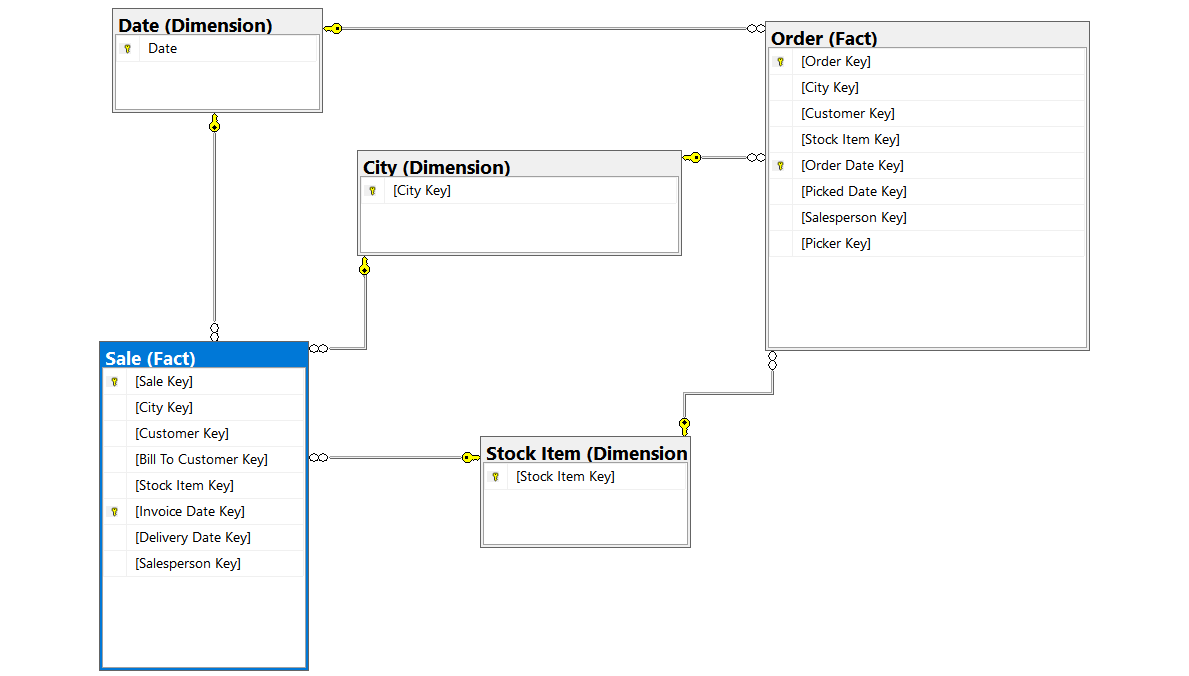

St<mark>a</mark>nd<mark>a</mark>rd View

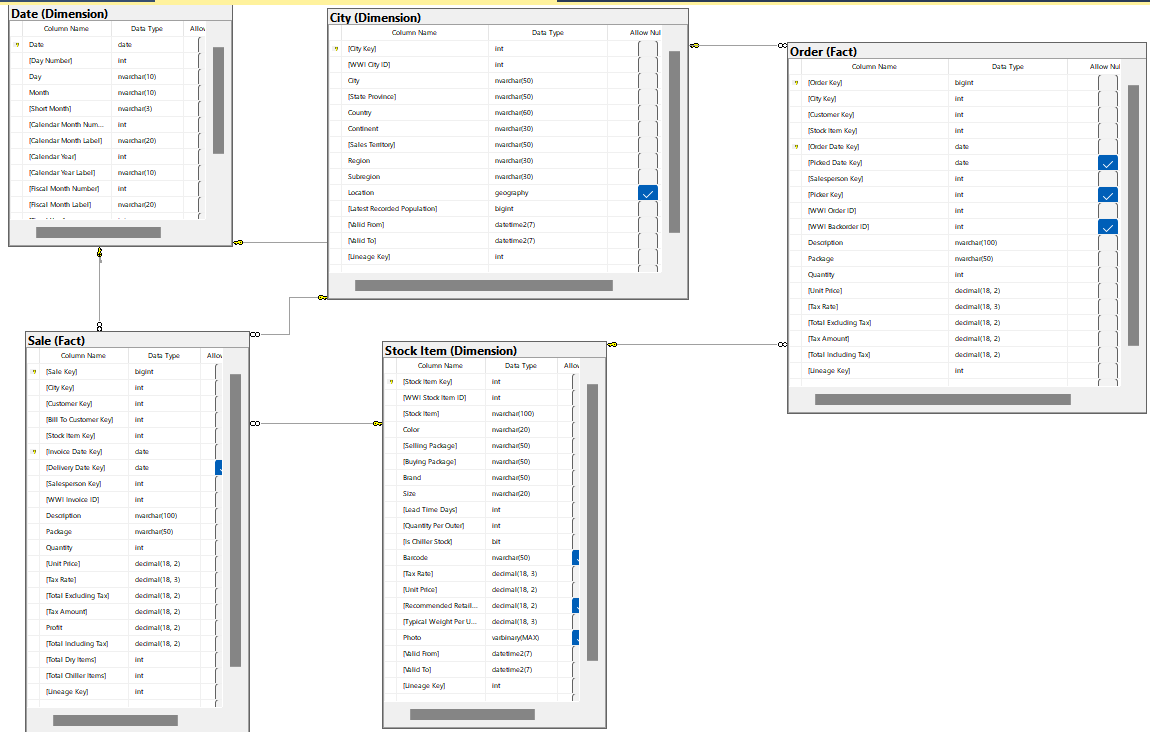

In [30]:
USE WideWorldImportersDW;
GO
-- Define a custom scalar function to categorize profit
DROP FUNCTION IF EXISTS dbo.CategorizeProfit;
GO
CREATE FUNCTION dbo.CategorizeProfit(@Profit AS DECIMAL(10,2))
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @Profit >= 7000 THEN 'High Profit'
            WHEN @Profit >= 5000 AND @Profit < 7000 THEN 'Medium Profit'
            ELSE 'Low Profit'
        END;
    
    RETURN @Category;
END;
GO

-- Complex query joining multiple tables
WITH ItemPrices AS (
    SELECT 
        dc.City,
        dc.[State Province],
        fs.Profit,
        si.[Stock Item],
        fs.[Unit Price],
        dd.[Date]
    FROM 
        Dimension.City AS dc
    INNER JOIN 
        Fact.[Order] AS fo ON dc.[City Key] = fo.[City Key]
    INNER JOIN
        Dimension.[Stock Item] AS si ON fo.[Stock Item Key] = si.[Stock Item Key]
    INNER JOIN
        Fact.[Sale] AS fs ON si.[Stock Item Key] = fs.[Stock Item Key]
    INNER JOIN
        Dimension.[Date] AS dd ON fs.[Invoice Date Key] = dd.[Date]

)
SELECT 
    City,
    [State Province],
    [Stock Item],
    Profit,
    [Unit Price],
    [Date],
    dbo.CategorizeProfit(Profit) AS ProfitCategory
FROM 
    ItemPrices
WHERE 
    YEAR([Date]) = '2015'
    AND Month([Date]) = '07'
    AND DAY([Date]) = '22'
    AND Profit BETWEEN 2000 AND 8000
    AND [State Province] IN ('New York', 'Texas') -- Filter for specified states
    AND [Stock Item] = '20 mm Double sided bubble wrap 50m' -- Filter for specific item

ORDER BY
    [State Province];
-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeProfit;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(126 rows affected)

Total execution time: 00:00:00.059

City State Province Stock Item Profit Unit Price Date ProfitCategory Chateaugay New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Great Neck New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Eagle Valley New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit North Ridge New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Greig New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Eagle Valley New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Wappingers Falls New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Caton New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Roe Park New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Lake Ronkonkoma New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Sauquoit New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Big Moose New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Eastchester New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Gasport New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Lime Lake New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Wappingers Falls New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Arietta New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Glen Park New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Islip Terrace New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Lime Lake New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Lake Erie Beach New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Schoharie New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Islip Terrace New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Copake New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Palatine Bridge New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Conewango New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Eagle Valley New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Esopus New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Shenorock New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Esopus New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Palatine Bridge New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Lake Ronkonkoma New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Eagle Valley New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Sauquoit New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Esopus New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit West Hempstead New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Great Neck Estates New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Eagle Valley New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Islip Terrace New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Trumansburg New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Gasport New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Sauquoit New York 20 mm Double sided bubble wrap 50m 7360.00 108.00 2015-07-22 High Profit Grei

## Q18 (Complex - AdventureWorks2017)

<u>Proposition:</u>

- Define a table-valued function dbo.GetEmployeeOrders that takes an employee ID (@empid) as input and returns details of orders made by that employee. 
- Tables involved: Sales.OrderDetails, Sales.[Order], HumanResources.Employee, Production.Product, Production.Category
    

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns
    
-

In [17]:
USE Northwinds2022TSQLV7;
GO

DROP FUNCTION IF EXISTS dbo.GetEmployeeOrders;
GO

CREATE FUNCTION dbo.GetEmployeeOrders(@empid INT)
RETURNS TABLE
AS
RETURN 
(
    SELECT 
        od.OrderID,
        o.OrderDate,
        od.ProductID,
        od.Quantity,
        od.UnitPrice,
        o.EmployeeId
    FROM 
        Sales.OrderDetail od
    INNER JOIN 
        Sales.[Order] o ON od.OrderID = o.OrderID
    WHERE 
        o.EmployeeID = @empid
);
GO

SELECT 
    e.OrderID, 
    e.OrderDate, 
    hr.EmployeeFirstName, 
    hr.EmployeeTitle, 
    c.CategoryName
FROM 
    dbo.GetEmployeeOrders(3) e
INNER JOIN 
    HumanResources.Employee hr ON e.EmployeeId = hr.EmployeeID
INNER JOIN 
    Production.Product p ON e.ProductID = p.ProductID
INNER JOIN 
    Production.Category c ON p.CategoryID = c.CategoryID;
GO

DROP FUNCTION IF EXISTS dbo.GetEmployeeOrders;


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(321 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.073

OrderID OrderDate EmployeeFirstName EmployeeTitle CategoryName 10251 2014-07-08 Judy Sales Manager Grains/Cereals 10251 2014-07-08 Judy Sales Manager Grains/Cereals 10251 2014-07-08 Judy Sales Manager Condiments 10253 2014-07-10 Judy Sales Manager Dairy Products 10253 2014-07-10 Judy Sales Manager Beverages 10253 2014-07-10 Judy Sales Manager Confections 10256 2014-07-15 Judy Sales Manager Meat/Poultry 10256 2014-07-15 Judy Sales Manager Condiments 10266 2014-07-26 Judy Sales Manager Dairy Products 10273 2014-08-05 Judy Sales Manager Seafood 10273 2014-08-05 Judy Sales Manager Dairy Products 10273 2014-08-05 Judy Sales Manager Dairy Products 10273 2014-08-05 Judy Sales Manager Seafood 10273 2014-08-05 Judy Sales Manager Beverages 10283 2014-08-16 Judy Sales Manager Condiments 10283 2014-08-16 Judy Sales Manager Confections 10283 2014-08-16 Judy Sales Manager Dairy Products 10283 2014-08-16 Judy Sales Manager Dairy Products 10309 2014-09-19 Judy Sales Manager Condiments 10309 2014-09-19 Judy Sales Manager Condiments 10309 2014-09-19 Judy Sales Manager Grains/Cereals 10309 2014-09-19 Judy Sales Manager Beverages 10309 2014-09-19 Judy Sales Manager Dairy Products 10321 2014-10-03 Judy Sales Manager Beverages 10330 2014-10-16 Judy Sales Manager Confections 10330 2014-10-16 Judy Sales Manager Dairy Products 10332 2014-10-17 Judy Sales Manager Seafood 10332 2014-10-17 Judy Sales Manager Grains/Cereals 10332 2014-10-17 Judy Sales Manager Confections 10346 2014-11-05 Judy Sales Manager Meat/Poultry 10346 2014-11-05 Judy Sales Manager Grains/Cereals 10352 2014-11-12 Judy Sales Manager Beverages 10352 2014-11-12 Judy Sales Manager Meat/Poultry 10362 2014-11-25 Judy Sales Manager Confections 10362 2014-11-25 Judy Sales Manager Produce 10362 2014-11-25 Judy Sales Manager Meat/Poultry 10365 2014-11-27 Judy Sales Manager Dairy Products 10375 2014-12-06 Judy Sales Manager Produce 10375 2014-12-06 Judy Sales Manager Meat/Poultry 10381 2014-12-12 Judy Sales Manager Produce 10384 2014-12-16 Judy Sales Manager Confections 10384 2014-12-16 Judy Sales Manager Dairy Products 10391 2014-12-23 Judy Sales Manager Seafood 10409 2015-01-09 Judy Sales Manager Produce 10409 2015-01-09 Judy Sales Manager Confections 10410 2015-01-10 Judy Sales Manager Dairy Products 10410 2015-01-10 Judy Sales Manager Dairy Products 10413 2015-01-14 Judy Sales Manager Beverages 10413 2015-01-14 Judy Sales Manager Confections 10413 2015-01-14 Judy Sales Manager Beverages 10415 2015-01-15 Judy Sales Manager Meat/Poultry 10415 2015-01-15 Judy Sales Manager Dairy Products 10420 2015-01-21 Judy Sales Manager Meat/Poultry 10420 2015-01-21 Judy Sales Manager Seafood 10420 2015-01-21 Judy Sales Manager Beverages 10420 2015-01-21 Judy Sales Manager Seafood 10429 2015-01-29 Judy Sales Manager Confections 10429 2015-01-29 Judy Sales Manager Condiments 10432 2015-01-31 Judy Sales Manager Confections 10432 2015-01-31 Judy Sales Manager Meat/Poultry 10433 2015-02-03 Judy Sales Manager Grains/Cereals 10434 2015-02-03 Judy Sales Manager Dairy Products 10434 2015-02-03 Judy Sales Manager Beverages 10436 2015-02-05 Judy Sales Manager Seafood 10436 2015-02-05 Judy Sales Manager Grains/Cereals 10436 2015-02-05 Judy Sales Manager Grains/Cereals 10436 2015-02-05 Judy Sales Manager Beverages 10438 2015-02-06 Judy Sales Manager Confections 10438 2015-02-06 Judy Sales Manager Beverages 10438 2015-02-06 Judy Sales Manager Grains/Cereals 10441 2015-02-10 Judy Sales Manager Confections 10442 2015-02-11 Judy Sales Manager Dairy Products 10442 2015-02-11 Judy Sales Manager Meat/Poultry 10442 2015-02-11 Judy Sales Manager Condiments 10444 2015-02-12 Judy Sales Manager Meat/Poultry 10444 2015-02-12 Judy Sales Manager Confections 10444 2015-02-12 Judy Sales Manager Beverages 10444 2015-02-12 Judy Sales Manager Seafood 10445 2015-02-13 Judy Sales Manager Beverages 10445 2015-02-13 Judy Sales Manager Meat/Poultry 10449 2015-02-18 Judy Sales Manager Seafood 10449 2015-02-18 Judy Sales Manager Grains/Cereals 

## Q19 (Complex - AdventureWorks2017)

<u>Proposition:</u>

- Write a query that retrieves the product name, its special discount percentage, rating, start and end dates of the discount, and its standard price for comparison. Arrange the results from greatest to lowest discount percentage. 
- Tables involved: Production.ProductReview, Production.Product, Sales.SpecialOfferProduct, Sales.SpecialOffer, and Purchasing.ProductVendor
    

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns
    

Key View

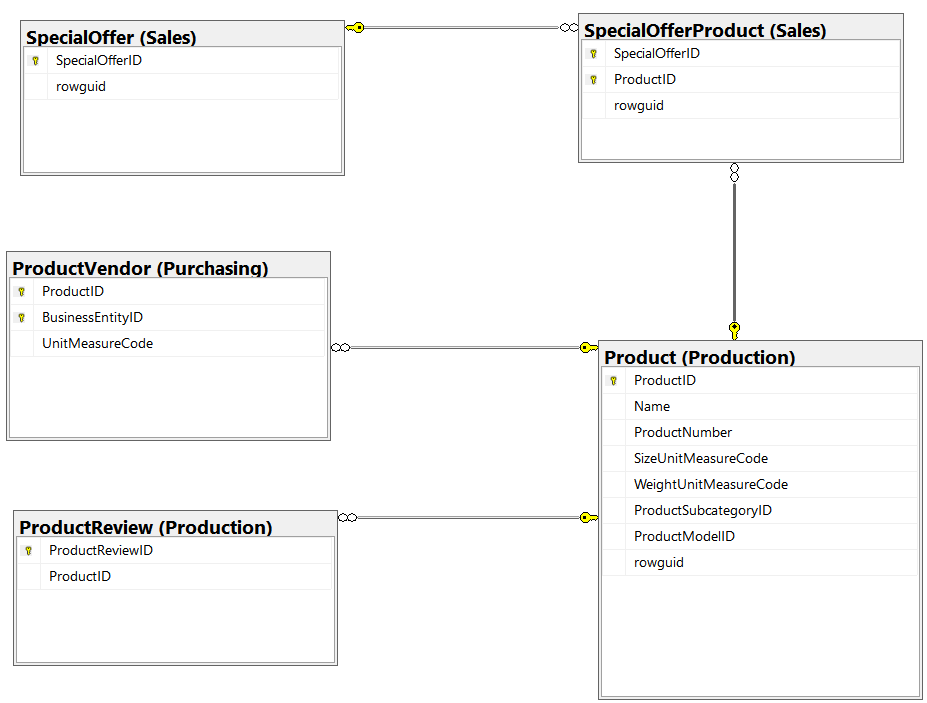

Standard View

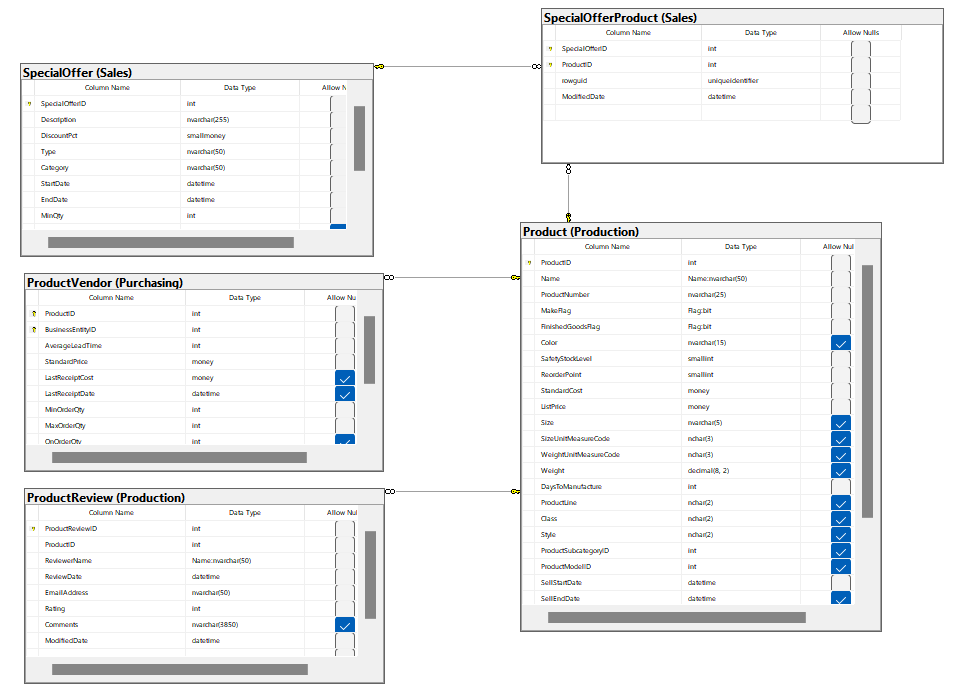

Columns

| Table Name | Column Name |
| --- | --- |
| Production.ProductReview | Rating<br><br> |
| Production.Product | Name |
| Sales.SpecialOfferProduct | DiscountPct |
| <br> | StartDate |
| <br> | EndDate |
| Sales.SpecialOffer | <br> |
| Purchasing.ProductVendor | StandardPrice |

In [16]:
USE AdventureWorks2017;
GO

-- Define a custom scalar function to categorize discount percentage
DROP FUNCTION IF EXISTS dbo.CategorizeDiscountPercentage;
GO
CREATE FUNCTION dbo.CategorizeDiscountPercentage(@DiscountPct AS DECIMAL(10,2))
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @DiscountPct <= .20 THEN 'Low Discount'
            WHEN @DiscountPct > .20 AND @DiscountPct <= .40 THEN 'Medium Discount'
            ELSE 'High Discount'
        END;
    
    RETURN @Category;
END;
GO

WITH StoreProductDiscounts AS (
    SELECT 
        s.Rating,
        p.Name AS ProductName,
        so.DiscountPct,
        so.StartDate,
        so.EndDate,
        st.StandardPrice,
        dbo.CategorizeDiscountPercentage(so.DiscountPct) AS DiscountCategory
    FROM 
        Production.ProductReview s
    INNER JOIN 
        Production.Product p ON s.ProductID = p.ProductID
    INNER JOIN 
        Sales.SpecialOfferProduct sop ON p.ProductID = sop.ProductID
    INNER JOIN 
        Sales.SpecialOffer so ON sop.SpecialOfferID = so.SpecialOfferID
    INNER JOIN 
        Purchasing.ProductVendor st ON s.ProductID = st.ProductID
),
MaxDiscounts AS (
    SELECT 
        Rating,
        ProductName,
        MAX(DiscountPct) AS MaxDiscount
    FROM 
        StoreProductDiscounts
    GROUP BY 
        Rating, ProductName
)
SELECT 
    spd.Rating,
    spd.ProductName,
    spd.DiscountPct,
    spd.StartDate,
    spd.EndDate,
    spd.StandardPrice,
    spd.DiscountCategory
FROM 
    StoreProductDiscounts spd
INNER JOIN 
    MaxDiscounts  AS md ON spd.Rating = md.Rating
                    AND spd.ProductName = md.ProductName 
                    AND spd.DiscountPct = md.MaxDiscount
WHERE 
    spd.DiscountPct = md.MaxDiscount
ORDER BY 
    spd.DiscountPct DESC
--FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeDiscountPercentage;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(3 rows affected)

Total execution time: 00:00:00.134

Rating ProductName DiscountPct StartDate EndDate StandardPrice DiscountCategory 2 HL Mountain Pedal 0.50 2013-07-14 00:00:00.000 2013-08-14 00:00:00.000 59.99 High Discount 4 HL Mountain Pedal 0.50 2013-07-14 00:00:00.000 2013-08-14 00:00:00.000 59.99 High Discount 5 Mountain Bike Socks, M 0.10 2011-05-31 00:00:00.000 2014-05-30 00:00:00.000 3.10 Low Discount

## #20 (Complex - Northwinds2022TSQLV7)

<u>Proposition:</u>

- Return a query that calculates the total sales for each product category and determines the fiscal quarter based on the order date. The fiscal quarter is defined from May to April, categorized as QTR I (May to July), QTR II (August to October), QTR III (November to January), and QTR IV (February to April). The query orders the results by total sales (TotalSales) in descending order.
- Tables involved: Sales.\[order\], Sales.OrderDetail, Production.product, Production.category

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [32]:
USE Northwinds2022TSQLV7;
GO

DROP FUNCTION IF EXISTS dbo.salesfiscalquarter;
GO

CREATE FUNCTION dbo.salesfiscalquarter(@orderdate DATE)
RETURNS NVARCHAR(20)
AS
BEGIN
    DECLARE @result NVARCHAR(20), @fiscalQuarter NVARCHAR(20);

    SET @fiscalQuarter = CASE
                            WHEN MONTH(@orderdate) BETWEEN 5 AND 7 THEN 'QTR I'
                            WHEN MONTH(@orderdate) BETWEEN 8 AND 10 THEN 'QTR II'
                            WHEN MONTH(@orderdate) BETWEEN 11 AND 12 THEN 'QTR III'
                            WHEN MONTH(@orderdate) BETWEEN 1 AND 4 THEN 'QTR IV'
                            ELSE 'UNKNOWN QTR'
                        END;

    SET @result = CONCAT('FY', YEAR(@orderdate) + CASE WHEN MONTH(@orderdate) BETWEEN 5 AND 12 THEN 1 ELSE 0 END, '-', @fiscalQuarter);

    RETURN @result;
END;
GO


WITH productquarter AS (
    SELECT 
        so.orderdate, 
        SUM(sod.unitprice) AS TotalSales, 
        pc.CategoryName, 
        dbo.salesfiscalquarter(so.orderdate) AS FiscalQuarter
    FROM 
        sales.[order] AS so
    INNER JOIN 
        sales.OrderDetail AS sod ON so.orderid = sod.orderid
    INNER JOIN 
        production.product AS pp ON sod.productid = pp.productid
    INNER JOIN 
        production.category AS pc ON pp.CategoryId = pc.CategoryId
    GROUP BY 
        so.orderdate, 
        pc.CategoryName
)

SELECT 
    OrderDate, 
    TotalSales, 
    FiscalQuarter, 
    CategoryName
FROM 
    productquarter
ORDER BY 
    totalsales DESC;


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(1605 rows affected)

Total execution time: 00:00:00.068

OrderDate TotalSales FiscalQuarter CategoryName 2015-05-19 531.50 FY2016-QTR I Beverages 2016-01-06 527.00 FY2016-QTR IV Beverages 2016-02-02 331.50 FY2016-QTR IV Beverages 2016-01-14 327.50 FY2016-QTR IV Beverages 2016-03-27 317.25 FY2016-QTR IV Beverages 2016-04-17 305.00 FY2016-QTR IV Beverages 2016-01-13 300.50 FY2016-QTR IV Beverages 2016-02-16 296.50 FY2016-QTR IV Beverages 2015-12-18 289.25 FY2016-QTR III Beverages 2015-07-31 278.50 FY2016-QTR I Beverages 2015-12-30 277.50 FY2016-QTR III Beverages 2015-04-25 268.00 FY2015-QTR IV Beverages 2015-09-17 263.50 FY2016-QTR II Beverages 2016-03-20 263.50 FY2016-QTR IV Beverages 2015-09-30 259.79 FY2016-QTR II Meat/Poultry 2014-11-22 225.20 FY2015-QTR III Beverages 2015-01-23 225.20 FY2015-QTR IV Beverages 2015-01-16 210.80 FY2015-QTR IV Beverages 2014-12-04 210.80 FY2015-QTR III Beverages 2014-11-11 210.80 FY2015-QTR III Beverages 2014-11-13 210.80 FY2015-QTR III Beverages 2014-10-15 210.80 FY2015-QTR II Beverages 2015-03-19 210.80 FY2015-QTR IV Beverages 2015-12-29 186.79 FY2016-QTR III Meat/Poultry 2016-04-17 167.50 FY2016-QTR IV Dairy Products 2016-02-26 162.79 FY2016-QTR IV Meat/Poultry 2016-03-24 162.79 FY2016-QTR IV Meat/Poultry 2015-10-09 162.79 FY2016-QTR II Meat/Poultry 2016-04-17 156.59 FY2016-QTR IV Meat/Poultry 2016-01-15 156.59 FY2016-QTR IV Meat/Poultry 2016-05-06 152.00 FY2017-QTR I Condiments 2016-04-01 147.79 FY2016-QTR IV Meat/Poultry 2016-03-26 147.25 FY2016-QTR IV Condiments 2015-05-14 134.30 FY2016-QTR I Dairy Products 2015-12-23 131.24 FY2016-QTR III Meat/Poultry 2016-01-06 129.83 FY2016-QTR IV Confections 2016-05-06 125.10 FY2017-QTR I Confections 2015-04-18 123.79 FY2015-QTR IV Meat/Poultry 2015-12-10 123.79 FY2016-QTR III Meat/Poultry 2016-01-28 123.79 FY2016-QTR IV Meat/Poultry 2016-04-07 123.79 FY2016-QTR IV Meat/Poultry 2016-04-08 123.79 FY2016-QTR IV Meat/Poultry 2015-12-19 123.79 FY2016-QTR III Meat/Poultry 2016-02-18 123.79 FY2016-QTR IV Meat/Poultry 2016-02-19 123.79 FY2016-QTR IV Meat/Poultry 2015-10-03 123.79 FY2016-QTR II Meat/Poultry 2015-09-12 123.79 FY2016-QTR II Meat/Poultry 2015-06-30 123.79 FY2016-QTR I Meat/Poultry 2015-08-07 123.79 FY2016-QTR II Meat/Poultry 2015-08-12 123.79 FY2016-QTR II Meat/Poultry 2016-04-14 121.43 FY2016-QTR IV Confections 2016-03-06 120.65 FY2016-QTR IV Confections 2016-03-30 115.90 FY2016-QTR IV Confections 2015-12-26 110.80 FY2016-QTR III Dairy Products 2015-07-21 110.50 FY2016-QTR I Dairy Products 2015-10-27 107.39 FY2016-QTR II Seafood 2014-11-22 104.90 FY2015-QTR III Meat/Poultry 2015-10-06 104.45 FY2016-QTR II Meat/Poultry 2016-05-06 104.00 FY2017-QTR I Dairy Products 2015-01-21 103.80 FY2015-QTR IV Meat/Poultry 2016-05-01 103.25 FY2017-QTR I Meat/Poultry 2016-03-05 100.50 FY2016-QTR IV Confections 2016-01-27 99.50 FY2016-QTR IV Seafood 2015-02-10 99.00 FY2015-QTR IV Meat/Poultry 2014-12-13 99.00 FY2015-QTR III Meat/Poultry 2015-01-01 99.00 FY2015-QTR IV Meat/Poultry 2015-03-05 99.00 FY2015-QTR IV Meat/Poultry 2014-12-02 99.00 FY2015-QTR III Meat/Poultry 2014-11-14 99.00 FY2015-QTR III Meat/Poultry 2014-08-27 99.00 FY2015-QTR II Meat/Poultry 2014-09-13 99.00 FY2015-QTR II Meat/Poultry 2014-07-30 99.00 FY2015-QTR I Meat/Poultry 2015-04-23 97.00 FY2015-QTR IV Meat/Poultry 2016-01-23 97.00 FY2016-QTR IV Meat/Poultry 2015-09-23 95.50 FY2016-QTR II Dairy Products 2016-01-19 94.75 FY2016-QTR IV Seafood 2016-01-13 93.50 FY2016-QTR IV Confections 2016-04-13 93.00 FY2016-QTR IV Dairy Products 2016-03-10 93.00 FY2016-QTR IV Beverages 2015-05-01 92.54 FY2016-QTR I Seafood 2016-04-22 91.85 FY2016-QTR IV Condiments 2015-04-22 91.00 FY2015-QTR IV Confections 2015-10-06 91.00 FY2016-QTR II Dairy Products 2015-11-27 91.00 FY2016-QTR III Dairy Products 2015-01-10 90.00 FY2015-QTR IV Dairy Products 2015-11-18 89.80 FY2016-QTR III Dairy Products 2015-06-20 89.80 FY2016-QTR I Dairy Products 2016-04-02 89.00 FY2016-QTR IV Dairy Products 2015-06-12 88.50 FY2016-QTR I Dairy Products 2016-03-20 88.50 FY2016-QTR IV Seafood 2015-0